### Введение

В этом модуле мы продолжаем знакомство с моделями МО в области обучения с учителем. На этот раз поговорим о задаче классификации. Вспомним, где находится классификация на нашей карте машинного обучения:

<img src="data\dst3-ml1-3_2.png" alt="drawing" width="800"/>

Вначале мы снова обратимся к классу линейных моделей и рассмотрим **логистическую регрессию**.

↓

Затем поговорим о **деревьях решений** для задачи классификации и научимся строить из этих деревьев целый лес.

### 2. Логистическая регрессия

Для начала вспомним, что такое классификация.

**Задача классификации (classification)** — задача, в которой мы пытаемся предсказать класс объекта на основе признаков в наборе данных. То есть задача сводится к предсказанию целевого признака, который является **категориальным**.

Когда классов, которые мы хотим предсказать, только два, классификация называется **бинарной**. Например, мы можем предсказать, болен ли пациент раком, является ли изображение человеческим лицом, является ли письмо спамом и т. д.

Когда классов, которые мы хотим предсказать, более двух, классификация называется **мультиклассовой (многоклассовой)**. Например, предсказание модели самолёта по радиолокационным снимкам, классификация животных на фотографиях, определение языка, на котором говорит пользователь, разделение писем на группы.

<img src="data\dst3-ml1-3_9.png" alt="drawing" width="400"/>

→ Для простоты мы пока разберёмся с бинарной классификацией, а в следующем юните обобщим результат на мультиклассовую.

Что вообще означает «решить задачу классификации»? Это значит построить разделяющую поверхность в пространстве признаков, которая делит пространство на части, каждая из которых соответствует определённому классу. 

Ниже представлены примеры разделяющих поверхностей, которые производят бинарную классификацию. Красным и синим цветом обозначены классы, зелёным — собственно поверхность, которая делит пространство признаков на две части. В каждой из этих частей находятся только наблюдения определённого класса.

<img src="data\dst3-ml3-2_1.png" alt="drawing" width="900"/>

Модели, которые решают задачу классификации, называются классификаторами (classifier).

Если взять в качестве разделяющей поверхности некоторую плоскость (ровная поверхность на первом рисунке), то мы получаем модель логистической регрессии, которая тесно связана с рассмотренной нами ранее линейной регрессией.

Давайте для начала вспомним, как выглядит уравнение модели линейной регрессии в общем случае:

<img src="data\pic-1.png" alt="drawing" width="1000"/>

→ Но всё это работает только в том случае, когда целевой признак *y*, который мы хотим предсказать, является числовым, например цена, вес, время аренды и т. д.

Что же делать с этой моделью, когда целевой признак *y* является категориальным? Например, является письмо спамом или обычным письмом?

Можно предположить, что, раз у нас есть две категории, мы можем обозначить категории за *y*=1 (Спам) и *y*=0 (Не спам) и обучить линейную регрессию предсказывать 0 и 1.

Но результат будет очень плохим. Выглядеть это будет примерно так:

<img src="data\dst3-ml3-2_2.png" alt="drawing" width="800"/>

Для больших значений *x* прямая будет выдавать значения больше 1, а для очень маленьких — меньше 0. Что это значит? Непонятно. Непонятно и то, что делать со значениями в диапазоне от 0 до 1. Да, можно относить значения на прямой выше 0.5 к классу 1, а меньше либо равным 0.5 — к классу 0, но это всё «костыли».

Идея! Давайте переведём задачу классификации в задачу регрессии. Вместо предсказания класса будем предсказывать вероятность принадлежности к этому классу. 

Модель должна выдавать некоторую вероятность P, которая будет определять, принадлежит ли данный объект к классу 1: например, вероятность того, что письмо является спамом. При этом вероятность того, что письмо является обычным письмом (класс 0), определяется как P = Q -1.  

Когда модель будет обучена на предсказание вероятности, мы зададим некоторый порог вероятности. Если предсказанная вероятность будет выше этого порога, мы определим объект к классу 1, а если ниже — к классу 0.

Например, стандартный порог равен 0.5. То есть если вероятность P > 0.5, мы будем считать письмо спамом, а если P ≤ 0.5 — обычным информативным письмом.

В итоге мы добьёмся того, что будем предсказывать не дискретный категориальный, а непрерывный числовой признак, который лежит в диапазоне [0, 1]. А это уже знакомая нам задача регрессии.

→ Однако остался главный вопрос: как научить модель предсказывать вероятности, ведь они должны лежать строго в диапазоне от 0 до 1, а предсказания линейной регрессии лежат в диапазоне от -∞ до +∞ ? 

Тут-то мы и приходим к модели логистической регрессии — регрессии вероятностей.

### ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

**Логистическая регрессия (Logistic Regression)** — одна из простейших моделей для решения задачи классификации. Несмотря на простоту, модель входит в топ часто используемых алгоритмов классификации в Data Science.

В основе логистической регрессии лежит логистическая функция (logistic function) σ(z) — отсюда и название модели. Однако более распространённое название этой функции — **сигмόида (sigmoid)**. Записывается она следующим образом:

<img src="data\pic-2.png" alt="drawing" width="1000"/>

А вот график её зависимости от аргумента *z*:

<img src="data\dst3-ml3-2_3.png" alt="drawing" width="600"/>

<img src="data\pic-3.png" alt="drawing" width="1000"/>

Это ведь и есть свойства вероятности! Выходом сигмоиды является число от 0 до 1, которое можно интерпретировать как вероятность принадлежности к классу 1. Её мы и пытаемся предсказать.

Основная идея модели логистической регрессии: возьмём модель линейной регрессии (обозначим её выход за *z*)

<img src="data\pic-4.png" alt="drawing" width="1000"/>

<img src="data\pic-5.png" alt="drawing" width="1000"/>

Чего мы добились таким преобразованием?

Если мы обучим модель, то есть подберём  коэффициенты  
<img src="data\pic-6.png" alt="drawing" width="200"/>
(как их найти, обсудим чуть позже) таким образом, что для объектов класса 1 модель линейной регрессии начнёт выдавать положительное число, а для класса 0 — выдавать отрицательное число, то тогда, подставив предсказание линейной регрессии  в сигмоиду, мы сможем получать вероятности принадлежности к каждому из классов в диапазоне от 0 до 1.

Далее по порогу вероятности мы сможем определять, к какому классу принадлежит объект.

Это и есть наша цель. Мы свели задачу классификации к задаче регрессии для предсказания вероятностей. 

Для бинарной классификации описанное выше будет выглядеть следующим образом:

<img src="data\dst3-ml3-2_4.png" alt="drawing" width="600"/>

<img src="data\pic-7.png" alt="drawing" width="1000"/>

**Разберёмся с геометрией**

<img src="data\pic-8.png" alt="drawing" width="1000"/>

<img src="data\dst3-ml3-2_5.png" alt="drawing" width="600"/>

**Кулинарная аналогия**

Возьмите по пригоршне риса и гречки и рассыпьте крупы на столе. Попытайтесь наложить лист бумаги вертикально на плоскость стола так, чтобы максимально качественно отделить виды круп друг от друга.

Лист бумаги и будет разделяющей плоскостью. Вам необходимо найти такое расположение листа, при котором разделение будет наилучшим.

<img src="data\dst3-ml3-2_6.png" alt="drawing" width="400"/>

**В чём математический секрет?**

Математически подстановка в уравнение плоскости точки, которая не принадлежит ей (находится ниже или выше), означает вычисление расстояния от этой точки до плоскости.

Если точка находится ниже плоскости, расстояние будет отрицательным (z < 0).
Если точка находится выше плоскости, расстояние будет положительным (z > 0).
Если точка находится на самой плоскости, z = 0.
Мы знаем, что подстановка отрицательных чисел в сигмоиду приведёт к вероятности P < 0.5 , а постановка положительных — к вероятности P > 0.5. 

Таким образом, ключевым моментом в предсказании логистической регрессии является расстояние от точки до разделяющей плоскости в пространстве факторов. Это расстояние в литературе часто называется **отступом (margin)**. 

В этом и состоит секрет работы логистической регрессии.

Чем больше расстояние от точки, находящейся выше разделяющей плоскости, до самой плоскости, тем больше оценка вероятности принадлежности к классу 1.

Попробуйте подставить различные координаты точек в модель логистической регрессии и убедитесь в этом.

Можно построить тепловую карту, которая показывает, чему равны вероятности в каждой точке пространства:

<img src="data\dst3-ml3-2_7.png" alt="drawing" width="600"/>

На рисунке точки, которые относятся к классу непоступивших абитуриентов, лежащие ниже разделяющей плоскости, находятся в красной зоне. Чем насыщеннее красный цвет, тем ниже вероятность того, что абитуриент поступит в аспирантуру. И наоборот, точки, которые относятся к классу поступивших абитуриентов, лежащие выше разделяющей плоскости, находятся в синей зоне. Чем насыщеннее синий цвет, тем выше вероятность того, что абитуриент поступит в аспирантуру.

Для случая зависимости целевого признака y от трёх факторов x1, x2 и x3, например от баллов за два экзамена и рейтинга университета, из которого выпустился абитуриент, выражение для z будет иметь вид:

<img src="data\pic-10.png" alt="drawing" width="1000"/>

Уравнение задаёт плоскость в четырёхмерном пространстве. Но если вспомнить, что y — категориальный признак и классы можно обозначить цветом, то получится перейти в трёхмерное пространство. Разделяющая плоскость будет выглядеть следующим образом:

<img src="data\dst3-ml3-2_8.png" alt="drawing" width="500"/>

В общем случае, когда у нас есть зависимость от m факторов, линейное выражение, находящееся под сигмоидой, будет обозначать разделяющую гиперплоскость.

<img src="data\pic-11.png" alt="drawing" width="1000"/>

### ПОИСК ПАРАМЕТРОВ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

Итак, мы разобрались с тем, как выглядит модель логистической регрессии и что она означает в геометрическом смысле.

Но остался один главный вопрос: как найти такие коэффициенты   
<img src="data\pic-12.png" alt="drawing" width="200"/>, 
чтобы гиперплоскость разделяла пространство наилучшим образом?

<img src="data\dst3-ml1-2_1.png" alt="drawing" width="600"/>

<img src="data\pic-13.png" alt="drawing" width="1000"/>

https://habr.com/ru/post/485872/

<img src="data\pic-14.png" alt="drawing" width="1000"/>

<img src="data\pic-15.png" alt="drawing" width="1000"/>

Такие расчёты можно производить для любых значений параметров, меняется только оценка вероятности Pi.

Примечание. К сожалению, функция likelihood не имеет интерпретации, то есть нельзя сказать, что значит число 2.34 в контексте правдоподобия.

Цель — найти такие параметры, при которых наблюдается максимум этой функции.

Теперь пора снова применить магию математики, чтобы привести задачу к привычному нам формату минимизации эмпирического риска. По правилам оптимизации, если поставить перед функцией минус, то задача оптимизации меняется на противоположную: был поиск максимума — станет поиском минимума.

<img src="data\pic-16.png" alt="drawing" width="1000"/>

Знакомая задача? Всё то же самое, что и с линейной регрессией, только функция ошибки другая.

→ К сожалению, для такой функции потерь аналитическое решение оптимизационной задачи найти не получится: при расчётах получается, что его попросту не существует.

Но мы помним, что, помимо аналитических решений, есть и численные.

Например, для поиска параметров можно использовать знакомый нам градиентный спуск. Вспомним, как выглядит итерационная формула данного метода:

<img src="data\pic-17.png" alt="drawing" width="1000"/>

Математическую реализацию вычисления градиента для logloss мы обсудим далее в курсе, а пока нас интересует исключительно его смысл.

Формула градиентного спуска для logloss (для любознательных)


<img src="data\pic-18.png" alt="drawing" width="500"/>

Мы уже знаем, что для того, чтобы повысить шанс пройти мимо локальных минимумов функции потерь, используется не сам градиентный спуск, а его модификации: например, можно использовать уже знакомый нам стохастический градиентный спуск (SGD).

Помним, что применение градиентного спуска требует предварительного масштабирования данных (стандартизации/нормализации). В реализации логистической регрессии в sklearn предусмотрено ещё несколько методов оптимизации, для которых масштабирование не обязательно. О них мы упомянём в практической части модуля.

Во избежание переобучения модели в функцию потерь логистической регрессии традиционно добавляется **регуляризация**. В реализации логистической регрессии в sklearn она немного отличается от той, что мы видели ранее для линейной регрессии.

<img src="data\pic-19.png" alt="drawing" width="1000"/>

Примечание для любознательных

<img src="data\pic-20.png" alt="drawing" width="1000"/>

Предлагаем вам посмотреть на то, как будет меняться форма сигмоиды, разделяющей плоскости при минимизации функции потерь logloss (она обозначена как cross-entropy в виде концентрических кругов — вид сверху), с помощью обычного градиентного спуска (не стохастического) в виде анимации.

<img src="data\dst3-ml3-2_12.gif" alt="drawing" width="500"/>   <img src="data\dst3-ml3-2_13.gif" alt="drawing" width="500"/> 

<img src="data\dst3-ml3-2_14.gif" alt="drawing" width="500"/> 

Не волнуйтесь, все громоздкие формулы уже реализованы в классических библиотеках, таких как sklearn. Но нам важно понимать принцип того, что происходит «под капотом», чтобы верно интерпретировать результат и по возможности управлять им.

Теперь давайте перейдём к практической реализации логистической регрессии и решим с её помощью задачу классификации. Но предварительно закрепим теоретический материал ↓

### ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ В SKLEARN

Мы будем работать со знакомым вам по модулю «Очистка данных» наборе данных о диабете, первоначально полученном в Национальном институте диабета, болезней органов пищеварения и почек.

Наша цель будет состоять в том, чтобы диагностически предсказать, есть ли у пациента диабет. На выбор экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года из индейского племени Пима.

В модуле по очистке данных вы уже производили очистку этого набора данных:

- удалили дубликаты,
- удалили неинформативный признак Gender,
- обработали «скрытые» пропуски в данных,
- избавились от потенциальных выбросов.

Если забыли, загляните в соответствующий раздел модуля.
https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DSPR-2.0+14JULY2021/jump_to_id/b3390bce9b6746d58b97ef42f9d26398  \

Очищенный датасет вы можете найти здесь.
https://lms.skillfactory.ru/assets/courseware/v1/c21dd892cc0cc4fba3976b2a91559ff0/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/diabetes_cleaned.zip
Итак, импортируем библиотеки, необходимые нам для работы с данными:

Итак, импортируем библиотеки, необходимые нам для работы с данными:

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

Затем прочитаем нашу таблицу:

In [2]:
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


Напомним, какие признаки у нас есть:

Pregnancies — количество беременностей;  
Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе;  
BloodPressure — диастолическое артериальное давление (мм рт. ст.);  
SkinThickness — толщина кожной складки трицепса (мм);  
BMI — индекс массы тела (вес в кг роcт в м);  
DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости);  
Age — возраст;  
Outcome — наличие диабета (0 — нет, 1 — да), целевой признак.  

Размер таблицы:

In [3]:
print(diabetes_data.shape)
#(757, 8)

(757, 8)


Давайте посмотрим на матрицу корреляций и выберем наиболее коррелированные с целевым признаком факторы:

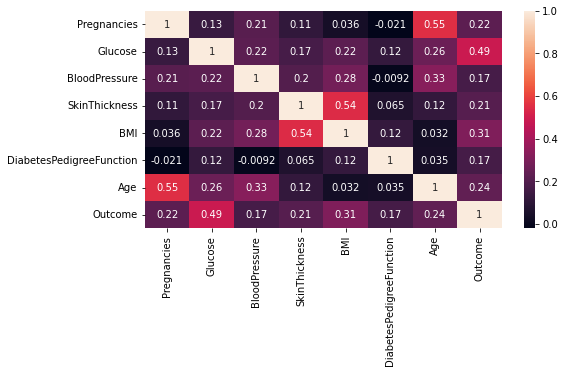

In [4]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.heatmap(diabetes_data.corr(), annot=True);

Из строки Outcome видно, что наибольшей корреляцией с целевым признаком обладают факторы Glucose (уровень глюкозы) и BMI (индекс массы тела).

Построим диаграмму рассеяния, по оси абсцисс отложим фактор Glucose, а по оси ординат — BMI. Сделаем цветовую группировку по признаку наличия диабета:

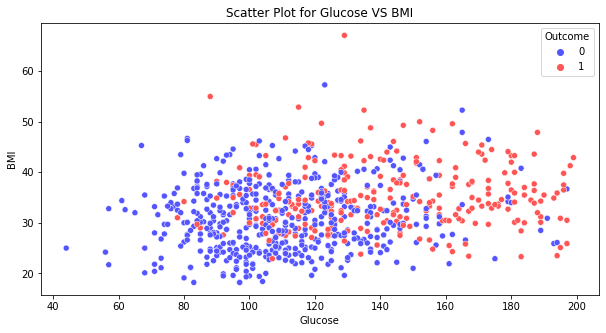

In [5]:
fig, ax = plt.subplots(figsize = (10, 5)) #фигура + координатная плоскость
#Строим диаграмму рассеяния
sns.scatterplot(
    data=diabetes_data, #датасет
    x='Glucose', #ось абсцисс
    y='BMI', #ось ординат
    hue='Outcome', #группировка
    palette='seismic', #палитра
    ax=ax, #координатная плоскость
);

#Задаём название графику
ax.set_title('Scatter Plot for Glucose VS BMI');

Видно, что классы довольно сильно перемешаны, но красные точки, соответствующие пациентам с диабетом, преимущественно сгруппированы в правой части системы координат.

Давайте попробуем построить разделяющую плоскость с помощью логистической регрессии.

Для начала разделим выборку на матрицу наблюдений X, состоящую из двух признаков, и столбец с правильным ответами y:

In [6]:
#Создаём матрицу наблюдений X и столбец с ответами y
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

Логистическая регрессия — линейная модель, поэтому она находится в уже знакомом нам модуле linear_model из библиотеки sklearn.

In [7]:
from sklearn import linear_model #линейные модели

В модуле находится класс LogisticRegression, который реализует поиск коэффициентов разделяющей плоскости путём минимизации функции потерь logloss различными численными методами.

Основные параметры LogisticRegression

random_state — число, на основе которого происходит генерация случайных чисел.  
penalty — метод регуляризации. Возможные значения:  
'l1' — L1-регуляризация;  
'l2' — L2-регуляризация (используется по умолчанию);  
'elasticnet' — эластичная сетка (L1+L2);  
'none' — отсутствие регуляризации.  
C — коэффициент обратный коэффициенту регуляризации, то есть равен . Чем больше C, тем меньше регуляризация. По умолчанию C=1, тогда α=1.  
solver — численный метод оптимизации функции потерь logloss, может быть:  
'sag' — стохастический градиентный спуск (нужна стандартизация/нормализация);  
'saga' — модификация предыдущего, которая поддерживает работу с негладкими функциями (нужна стандартизация/нормализация); 
https://arxiv.org/pdf/1407.0202.pdf   
'newton-cg' — метод Ньютона с модификацией сопряжённых градиентов (не нужна стандартизация/нормализация);  
https://docs.scipy.org/doc/scipy/tutorial/optimize.html#newton-conjugate-gradient-algorithm-method-newton-cg  
'lbfgs' — метод Бройдена — Флетчера — Гольдфарба — Шанно (не нужна стандартизация/нормализация; используется по умолчанию, так как из всех методов теоретически обеспечивает наилучшую сходимость);  
https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%91%D1%80%D0%BE%D0%B9%D0%B4%D0%B5%D0%BD%D0%B0_%E2%80%94_%D0%A4%D0%BB%D0%B5%D1%82%D1%87%D0%B5%D1%80%D0%B0_%E2%80%94_%D0%93%D0%BE%D0%BB%D1%8C%D0%B4%D1%84%D0%B0%D1%80%D0%B1%D0%B0_%E2%80%94_%D0%A8%D0%B0%D0%BD%D0%BD%D0%BE  
'liblinear' — метод покоординатного спуска (не нужна стандартизация/нормализация).  
http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BF%D0%BE%D0%BA%D0%BE%D0%BE%D1%80%D0%B4%D0%B8%D0%BD%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%81%D0%BF%D1%83%D1%81%D0%BA%D0%B0  
max_iter — максимальное количество итераций, выделенных на сходимость.  

Обучим логистическую регрессию, сделав значением параметра random_state, например, число 42 (традиционное число, которое означает ответ на вопрос о смысле жизни https://ru.wikipedia.org/wiki/%D0%9E%D1%82%D0%B2%D0%B5%D1%82_%D0%BD%D0%B0_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D0%B9_%D0%B2%D0%BE%D0%BF%D1%80%D0%BE%D1%81_%D0%B6%D0%B8%D0%B7%D0%BD%D0%B8, 
чтобы гарантировано получить одинаковые результаты. Остальные параметры оставим по умолчанию.

Для обучения модели необходимо просто вызвать метод fit(), передав в него матрицу наблюдений X и вектор правильных ответов y.

Чтобы получить параметр w0, нужно обратиться к атрибуту intercept_, а вектор параметров  w1, w2, ..., wm будет храниться в атрибуте coef_ (так как в матрице X два фактора, то и коэффициента будет два):

In [8]:
#Создаём объект класса LogisticRegression
log_reg_2d = linear_model.LogisticRegression(random_state=42)
#Обучаем модель, минимизируя logloss
log_reg_2d.fit(X, y)
#Выводим результирующие коэффициенты
print('w0: {}'.format(log_reg_2d.intercept_)) #свободный член w0
print('w1, w2: {}'.format(log_reg_2d.coef_)) #остальные параметры модели w1, w2, ..., wm

# w0: [-8.24898965]
# w1, w2: [[0.03779275 0.0875742 ]]

w0: [-8.24898965]
w1, w2: [[0.03779275 0.0875742 ]]


→ В отличие от линейной регрессии, коэффициенты логистической регрессии интерпретировать сложнее. Мы не будем этим заниматься.

Как нам сделать предсказание вероятности наличия диабета у пациента?

Мы должны подставить значения факторов в уравнение разделяющей плоскости, а затем результат подставить в функцию сигмоиды. Как хорошо, что для этого есть метод predict_proba().

Например, появился новый пациент с концентрацией глюкозы 180 мг/100мл и индексом массы тела в 51 кг/м.кв
Мы хотим вычислить вероятность наличия/отсутствия диабета у данного пациента:

In [9]:
#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]
#Делаем предсказание вероятностей:
y_new_proba_predict = log_reg_2d.predict_proba(x_new)
print('Predicted probabilities: {}'.format(np.round(y_new_proba_predict, 2)))

# Predicted probabilities: [[0.05 0.95]]

Predicted probabilities: [[0.05 0.95]]


c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Метод predict_proba() возвращает сразу две вероятности: первая соответствует вероятности принадлежности к классу 0 (диабета нет), а вторая — вероятности принадлежности к классу 1 (диабет есть). Заметьте, что в сумме две вероятности дают 1, что вполне логично, так как события взаимоисключающие.

Если мы хотим предсказать не вероятности, а сам класс (1 или 0), нам пригодится метод predict(). По умолчанию метод predict() относит объект к классу 1, если вероятность принадлежности к классу 1 > 0.5, и к классу 0, если эта вероятность < 0.5.

In [10]:
#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]
#Делаем предсказание класса:
y_new_predict = log_reg_2d.predict(x_new)
print('Predicted class: {}'.format(y_new_predict))

# Predicted probabilities: [1]

c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Predicted class: [1]


Предсказанный класс равен 1: значит, модель считает, что данный пациент болеет диабетом.

Теперь построим визуализацию нашей модели.

Чтобы красиво визуализировать вероятности в виде тепловой карты, мы подготовили для вас специальную функцию — plot_probabilities_2d().

Данная функция принимает три аргумента:

- X — матрица с наблюдениями,  
- y — столбец с правильными ответами,  
- model — модель, с помощью которой делается предсказание вероятностей.  

→ Мы не будем подробно останавливаться на работе данной функции — она нам нужна только для красивой визуализации, но если вы захотите разобраться, мы написали подробные комментарии к каждой строчке кода.

In [11]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

Теперь вызовем нашу функцию и посмотрим, как логистическая вероятность делит пространство на две части.

c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


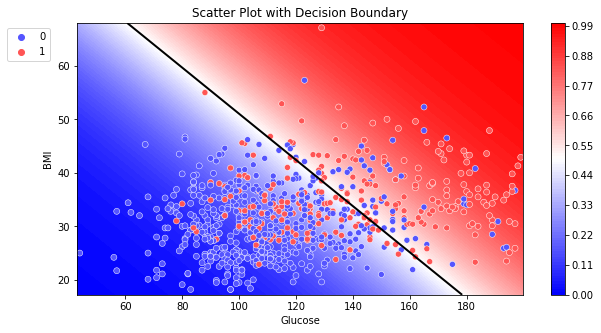

In [12]:
plot_probabilities_2d(X, y, log_reg_2d)

Мы видим разделяющую поверхность (обозначена чёрной линией). Она делит пространство на две части: красное соответствует точкам, которые будут отнесены моделью к классу 1, а синее соответствует точкам, которые будут отнесены моделью к классу 0.

Справа от графика есть цветовая панель, которая показывает значение вероятности того, что пациент болен диабетом (по мнению модели).

Обратите внимание, что чем более точка удалена от разделяющей плоскости, тем с большей вероятностью модель относит её к тому или иному классу. На тепловой карте это прослеживается в интенсивности синего и красного цвета.

Из графика видно, что довольно много синих точек попали в красную зону и наоборот. Видимо, информации о двух факторах всё же маловато для того, чтобы хорошо провести классификацию.

Давайте будем использовать для построения модели всю предоставленную нам информацию — все факторы из набора данных. Для этого заново создадим матрицу наблюдений X и вектор ответов y:

In [13]:
#Создаём матрицу признаков X и столбец с ответами y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

Затем обучим модель логистической регрессии с помощью метода fit().

Сделаем предсказание вероятности заболевания диабетом для каждого пациента и самих классов с помощью методов predict_proba() и predict().

In [14]:
#Создаём объект класса LogisticRegression
log_reg_full = linear_model.LogisticRegression(random_state=42, max_iter=1000)
#Обучаем модель, минимизируя logloss
log_reg_full.fit(X, y)
#Делаем предсказание класса
y_pred = log_reg_full.predict(X)

Затем добавим предсказание в таблицу X для наглядности:

In [15]:
#Создадим временную таблицу X
X_temp = X.copy()
#Добавим в эту таблицу результат предсказания
X_temp['Prediction'] = y_pred
X_temp.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Prediction
752,5,139.0,64.0,35.0,28.6,0.411,26,0
753,1,96.0,122.0,29.0,22.4,0.207,27,0
754,10,101.0,86.0,37.0,45.6,1.136,38,1
755,0,141.0,72.0,29.0,42.4,0.205,29,1
756,0,125.0,96.0,29.0,22.5,0.262,21,0


Итак, мы сделали предсказание для каждого наблюдения (пациента) из таблицы X.

К сожалению, теперь, когда признаков больше двух, построить красивую визуализацию разделяющей плоскости не получится.

→ Но как же тогда узнать, насколько хорошо модель определяет наличие диабета у пациента? Для этого используются метрики классификации, о которых мы поговорим в следующем юните.

**Задание 2.9**

Для выполнения задания скачайте набор данных.
https://lms.skillfactory.ru/assets/courseware/v1/6a019aae7e83a8a11bb1fdf0788e3e6e/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/task_data.zip  
Таблица состоит из трёх столбцов:

X_1 и X_2 — факторы;  
y — целевой признак.  

Обучите модель логистической регрессии для предсказания целевого признака y. В качестве алгоритма оптимизации используйте стохастический градиентный спуск (масштабировать данные не нужно). В качестве значения параметра random_state возьмите число 42, остальные параметры оставьте по умолчанию.

Воспользуйтесь функцией plot_probabilities_2d(), которую мы объявили ранее. Постройте визуализацию разделяющей поверхности.

Сколько объектов класса 0 будут неверно отнесены моделью к классу 1?

In [16]:
task_data = pd.read_csv('data/task_data.csv')
task_data.head()

,SNo,X_1,X_2,y
0,0,-0.869144,0.389310,0.0
1,1,-0.993467,-0.610591,0.0
2,2,-0.834064,0.239236,0.0
3,3,-0.136471,0.632003,1.0
4,4,0.403887,0.310784,1.0


In [17]:
#Создаём матрицу признаков X и столбец с ответами y
X = task_data.drop(['y', 'SNo'], axis=1)
y = task_data['y']

In [18]:
#Создаём объект класса LogisticRegression
log_reg_2d = linear_model.LogisticRegression(solver='sag', random_state=42)
#Обучаем модель, минимизируя logloss
log_reg_2d.fit(X, y)
#Выводим результирующие коэффициенты
print('w0: {}'.format(log_reg_2d.intercept_)) #свободный член w0
print('w1, w2: {}'.format(log_reg_2d.coef_)) #остальные параметры модели w1, w2, ..., wm

w0: [0.55556317]
w1, w2: [[2.80981798 2.58767105]]


c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


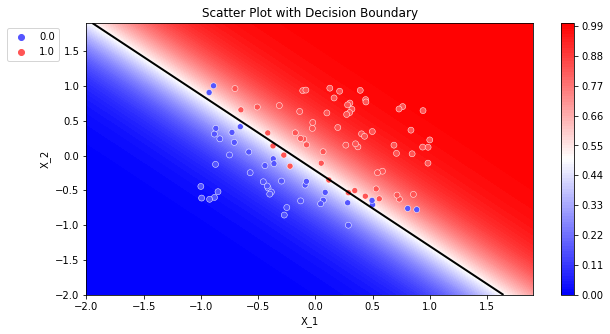

In [19]:
plot_probabilities_2d(X, y, log_reg_2d)

__________________________

### 3. Метрики классификации. Мультиклассовая классификация

✍ Мы научились обучать модель логистической регрессии, чтобы решать с её помощью задачу классификации. Теперь мы познакомимся с метриками классификации, чтобы научиться оценивать качество модели

### МЕТРИКИ КЛАССИФИКАЦИИ

<img src="data\pic-21.png" alt="drawing" width="1000"/>

Все метрики, которые мы рассмотрим, основаны на **матрице ошибок**. С неё мы и начнём наш разбор.

**Матрица ошибок (confusion matrix)** показывает все возможные исходы совпадения и несовпадения предсказания модели с действительностью. Используется для расчёта других метрик.

Допустим, у нас есть два класса и алгоритм, предсказывающий принадлежность каждого объекта одному из классов.

Назовём класс 1 **положительным исходом (positive)**, а класс 0 — **отрицательным исходом (negative)**.

Тогда матрица ошибок классификации будет выглядеть следующим образом:

<img src="data\pic-22.png" alt="drawing" width="1000"/>

Для наглядности можно представить предсказания модели следующей схемой:

<img src="data\dst3-ml3-3_1.png" alt="drawing" width="500"/>

Давайте посмотрим, как будет выглядеть матрица ошибок для нашего примера предсказаний модели log_reg_full:

<img src="data\pic-23.png" alt="drawing" width="1000"/>

**Примечание**. Нередко в русской литературе вы можете встретить перевод метрики accuracy как «точность», однако так же на русский язык переводится метрика precision, о которой мы поговорим далее. Поэтому, если вы используете термин «точность», старайтесь указывать, о какой именно метрике (accuracy или precision) идёт речь.

На основе матрицы ошибок составляются следующие метрики классификации ↓ 

<img src="data\pic-24.png" alt="drawing" width="1000"/>

Интерпретация: как много (в долях) модель угадала ответов.

Метрика изменяется в диапазоне от 0 до 1. Чем ближе значение к 1, тем больше ответов модель «угадала». 

Рассчитаем accuracy для нашего примера:

<img src="data\pic-25.png" alt="drawing" width="1000"/>

Итак, наша accuracy равна 0.5, то есть модель сделала верное предсказание для 50 % пациентов из выборки.

Accuracy — самая простая и самая понятная метрика классификации, но у неё есть один существенный недостаток. Она бесполезна, если классы сильно несбалансированы.

<img src="data\pic-26.png" alt="drawing" width="1000"/>

<img src="data\pic-27.png" alt="drawing" width="1000"/>

Диаграмма будет выглядеть так:

<img src="data\dst3-ml3-3_3.png" alt="drawing" width="300"/>

Метрика также изменяется от 0 до 1. 

Интерпретация: способность отделить класс 1 от класса 0. Чем больше precision, тем меньше ложных попаданий. 

Именно precision не позволяет записать все ответы в один класс, так как в таком случае резко возрастает значение False Positive и метрика снижается.

Рассчитаем precision для нашего примера:

<img src="data\pic-28.png" alt="drawing" width="1000"/>

Таким образом, количество названных моделью больных диабетом и при этом действительно являющихся больными составляет 67 % от всех пациентов.

Precision нужен в задачах, где от нас требуется минимум ложных срабатываний. Чем выше «цена» ложноположительного результата, тем выше должен быть precision.

Например, по камерам видеонаблюдения мы автоматически выявляем признаки драки на улицах и отправляем наряд полиции для урегулирования конфликта. Однако штат сотрудников сильно ограничен, реагировать на любой признак конфликта мы не можем, поэтому мы хотим уменьшить количество ложных вызовов. В такой ситуации мы выберем такую модель, у которой наибольший precision.

В предельном случае (когда precision равен 1) у модели отсутствуют ложные срабатывания.

<img src="data\pic-29.png" alt="drawing" width="1000"/>

<img src="data\dst3-ml3-3_4.png" alt="drawing" width="300"/>

Метрика изменяется от 0 до 1.

**Интерпретация**: способность модели обнаруживать класс 1 вообще, то есть охват класса 1. Заметьте, что ложные срабатывания не влияют на recall. 

Рассчитаем recall для нашего примера:

<img src="data\pic-30.png" alt="drawing" width="1000"/>

Итак, процент пациентов, которых модель определила к классу больных диабетом, среди всех действительно больных диабетом составляет 57 %.

Recall очень хорошо себя показывает в задачах, где важно найти как можно больше объектов, принадлежащих к классу 1.

Например, это различные диагностические задачи с серьёзными заболеваниями. В таких задачах последствия будут негативнее, если мы примем больного пациента за здорового, чем если мы примем здорового за больного. Нам важно охватить всех потенциально больных пациентов, чтобы сделать дополнительный анализ и удостовериться в результате.

Предельный случай (когда recall равен 1) означает, что модель нашла все объекты класса 1, например всех действительно больных пациентов. Однако метрика ничего не скажет о том, с какой точностью мы это сделали.

Метрики precision и recall не зависят от сбалансированности классов и в совокупности дают довольно исчерпывающее представление о классификаторе. Однако на практике часто бывает так, что **увеличение одной из метрик может привести к уменьшению другой**.

Концентрация только на одной метрике (precision или recall) без учёта второй — сомнительная идея.

В битве за максимум precision для класса 1 побеждает модель, которая всегда будет говорить говорить «нет». У неё вообще не будет ложных срабатываний.

В битве за максимум recall для класса 1 побеждает модель, которая всегда будет говорить «да». Она охватит все наблюдения класса 1. 

В реальности необходимо балансировать между двумя этими метриками.

Классическим примером является задача определения оттока клиентов.

Очевидно, что мы хотим найти как можно больше клиентов, которые потенциально могут уйти от нас. Чтобы повысить их лояльность, мы планируем использовать ресурсы колл-центра. Однако они ограничены и мы не можем звонить всем клиентам. Определив стратегию и ресурс для удержания клиентов, мы можем подобрать нужные пороги по precision и recall. Например, можно сосредоточиться на удержании только высокодоходных клиентов или тех, кто уйдёт с большей вероятностью. 

В таком случае нам подойдёт следующая метрика.

<img src="data\pic-31.png" alt="drawing" width="1000"/>

Несмотря на отсутствие бизнес-интерпретации, метрика F1 является довольно распространённой и используется в задачах, где необходимо выбрать модель, которая балансирует между precision и recall.

Например, если цена дополнительной диагностики заболевания очень высока, то есть ложных срабатываний должно быть минимум, но при этом нам важно охватить как можно больше больных пациентов. 

Давайте обобщим всё вышесказанное в виде таблицы:

<img src="data\pic-32.png" alt="drawing" width="1000"/>

<img src="data\pic-33.png" alt="drawing" width="1000"/>

<img src="data\pic-34.png" alt="drawing" width="1000"/>

<img src="data\pic-35.png" alt="drawing" width="1000"/>

### РАСЧЁТ МЕТРИК НА PYTHON

Теперь давайте посмотрим, как можно произвести расчёт метрик на Python.

Весь набор функций для вычисления метрик в sklearn находится в модуле metrics https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics. Давайте его импортируем:

In [20]:
from sklearn import metrics

Функции, которые нам понадобятся:

confusion_matrix() — расчёт матрицы ошибок,  
accuracy_score() — расчёт accuracy,  
precision_score() — расчёт precision,  
recall_score() — расчёт recall,  
f1_score() — расчёт -меры.  

Каждая из этих функций первым аргументом принимает предсказанные значения целевой переменной {y}, а вторым аргументом — истинные ответы y.

Давайте составим матрицы ошибок для моделей log_reg_2d и log_reg_full, которые мы обучили в прошлом юните.

Для этого сделаем предсказание наличия диабета для всех пациентов с помощью каждой из моделей:

In [21]:
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')
#Создаём матрицу признаков X и столбец с ответами y
#X = diabetes_data.drop('Outcome', axis=1)
# X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

In [22]:
#Создаём объект класса LogisticRegression
log_reg_2d = linear_model.LogisticRegression(random_state=42, max_iter=1000)
#Обучаем модель, минимизируя logloss
log_reg_2d.fit(diabetes_data[['Glucose', 'BMI']], y)

log_reg_full = linear_model.LogisticRegression(random_state=42, max_iter=1000)
#Обучаем модель, минимизируя logloss
log_reg_full.fit(diabetes_data.drop('Outcome', axis=1), y)


LogisticRegression(max_iter=1000, random_state=42)

In [23]:
#Делаем предсказание моделью, обученной на двух факторах 
y_pred1 = log_reg_2d.predict(diabetes_data[['Glucose', 'BMI']])
#Делаем предсказание моделью, обученной на всех факторах 
y_pred2 = log_reg_full.predict(diabetes_data.drop('Outcome', axis=1))

Построим матрицы ошибок для каждой модели, а затем отобразим их в виде тепловых карт:

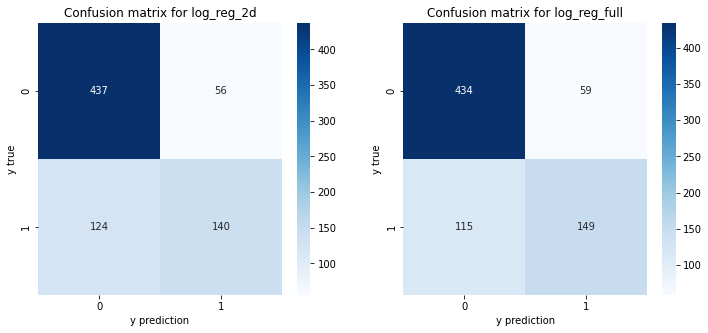

In [24]:
#Строим матрицы ошибок для каждой из моделей
confusion_matrix1 = metrics.confusion_matrix(y, y_pred1)
confusion_matrix2 = metrics.confusion_matrix(y, y_pred2)
#Визуализируем матрицы ошибок
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) #фигура + 2 координатные плоскости
#Строим тепловую карту для первой матрицы ошибок
sns.heatmap(confusion_matrix1, annot=True, fmt='', ax=axes[0], cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes[0].set_title('Confusion matrix for log_reg_2d')
axes[0].set_xlabel('y prediction')
axes[0].set_ylabel('y true')
#Строим тепловую карту для второй матрицы ошибок
sns.heatmap(confusion_matrix2, annot=True, fmt='', ax=axes[1], cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes[1].set_title('Confusion matrix for log_reg_full')
axes[1].set_xlabel('y prediction')
axes[1].set_ylabel('y true');

Видно, что матрицы ошибок незначительно отличаются по своим составляющим. На их основе можно вручную вычислить остальные метрики для каждой из моделей, но мы воспользуемся встроенными функциями.

Расчёт метрик для модели log_reg_2d, обученной на двух факторах — Glucose и BMI:

In [25]:
#Модель log_reg_2d:
#Рассчитываем accuracy
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y, y_pred1)))
#Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y, y_pred1)))
#Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y, y_pred1)))
#Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y, y_pred1)))
 
# Accuracy: 0.76
# Precision: 0.71
# Recall: 0.53
# F1 score: 0.61

Accuracy: 0.76
Precision: 0.71
Recall: 0.53
F1 score: 0.61


Расчёт метрик для модели log_reg_full, обученной на всех доступных факторах:

In [26]:
#Модель log_reg_full:
#Рассчитываем accuracy
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y, y_pred2)))
#Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y, y_pred2)))
#Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y, y_pred2)))
#Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y, y_pred2)))
 
# Accuracy: 0.77
# Precision: 0.72
# Recall: 0.56
# F1 score: 0.63

Accuracy: 0.77
Precision: 0.72
Recall: 0.56
F1 score: 0.63


А теперь давайте сравним:

- Accuracy: доля правильных ответов для первой модели составляет 0.76, для второй — 0.77.  
- Precision: способность первой модели отделять больных диабетом пациентов от здоровых пациентов составляет 0.71, а второй — 0.72.  
- Recall: обобщающая способность находить больных пациентов среди всех пациентов для первой модели — 0.53, а для второй — 0.56.  
- F1: среднее гармоническое между precision и recall для первой модели составляет 0.61, а для второй — 0.63.

Видно, что хоть и с небольшим отрывом, но вторая модель, обученная по всем признакам, превосходит первую модель по всем метрикам.

Для облегчения расчёта метрик можно использовать функцию classification_report() из модуля metrics. Она возвращает отчёт обо всех метриках классификации:

In [27]:
print(metrics.classification_report(y, y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       493
           1       0.72      0.56      0.63       264

    accuracy                           0.77       757
   macro avg       0.75      0.72      0.73       757
weighted avg       0.76      0.77      0.76       757



**Что здесь отображено?**

- В первой части таблицы отображаются метрики precision, recall и f1-score, рассчитанные для каждого класса в отдельности. Столбец support — это количество объектов каждого из классов.
- Во второй части таблицы отображена общая метрика accuracy. 
- Далее идёт строка macro avg — это среднее значение метрики между классами 1 и 0. Например, значение в строке macro avg и столбце recall = (0.88 + 0.56)/2=0.72.
- Завершает отчёт строка weighted avg — это средневзвешенное значение метрики между классами 1 и 0. Рассчитывается по формуле:

<img src="data\pic-36.png" alt="drawing" width="900"/>

Ранее мы говорили о метриках precision, recall и F1 только в контексте класса 1 (болеет диабетом). В отчёте classification_report() эти метрики рассчитаны и для класса 0. Смысл остаётся тем же, просто замените в рассуждениях класс 1 на класс 0.

Представим ситуацию, что дополнительная диагностика диабета в нашей клинике довольно дорогая. Но при этом нам важно выявить диабет у как можно большего числа людей. То есть нам важен и precision, и recall.

При этом наш recall равен 0.56, то есть мы находим только 56 % больных диабетом пациентов среди всех болеющих диабетом. Согласитесь, не очень хороший показатель (чуть выше половины). Можем ли мы его как-то улучшить?

Давайте будем изменять порог принятия решений. Сейчас порог составляет 0.5: то есть если вероятность наличия диабета у пациента выше 0.5, то модель относит его к больным диабетом, а если меньше 0.5 — к здоровым.

Но как будут меняться значения метрик recall, precision и F1, если мы попробуем изменить порог вероятности, например на 0.4, 0.3 или 0.6? Давайте проследим за этим.

**Примечание**. Геометрически регулировка порога вероятности для логистической регрессии означает движение разделяющей плоскости.

Сделаем предсказание вероятности наличия диабета моделью log_reg_full для каждого пациента из нашей выборки. Затем создадим несколько различных порогов вероятности в диапазоне от 0.1 до 1 с шагом 0.05. В цикле будем определять класс пациента при различных порогах вероятности. В конце рассчитаем метрики.

In [28]:
#Считаем вероятности наличия диабета для каждого из пациентов
#Нас интересует только вероятность класса (второй столбец)
y_proba_pred = log_reg_full.predict_proba(diabetes_data.drop('Outcome', axis=1))[:, 1]
#Для удобства завернём numpy-массив в Pandas Series
y_proba_pred = pd.Series(y_proba_pred)
#Создадим списки, в которых будем хранить значения метрик 
recall_scores = []
precision_scores = []
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #Пациентов, для которых вероятность наличия диабета > threshold, относим к классу 1
    #В противном случае — к классу 0
    y_pred = y_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y, y_pred))
    precision_scores.append(metrics.precision_score(y, y_pred))
    f1_scores.append(metrics.f1_score(y, y_pred))

Теперь у нас есть три списка (recall_scores, precision_scores и f1_scores), в которых хранятся значения метрик при различных значениях порога вероятности p.

Давайте построим графики зависимости метрик от порога вероятности:

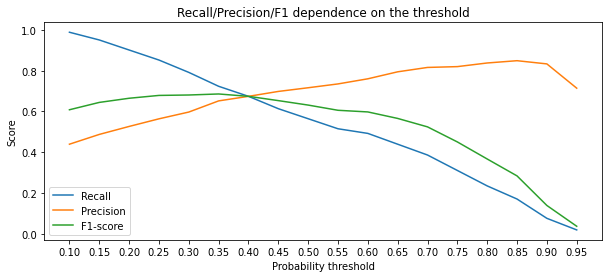

In [29]:
#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, recall_scores, label='Recall')
#Строим линейный график зависимости precision от threshold
ax.plot(thresholds, precision_scores, label='Precision')
#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')
 
#Даём графику название и подписываем оси
ax.set_title('Recall/Precision/F1 dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
#Устанавливаем отметки по оси x
ax.set_xticks(thresholds) 
#Отображаем легенду
ax.legend();

Что мы видим на графике?

С увеличением вероятностного порога повышается precision и падает recall. Очевидно, что с увеличением порога вероятности мы начинаем классифицировать как диабетиков только тех пациентов, в диагнозе которых мы хорошо уверены, то есть мы повышаем **точность (precision)**, но при этом мы отсекаем пациентов, которые больны, но модель выдаёт низкую вероятность болезни, то есть мы уменьшаем **охват (recall)**.

При этом значение F1-меры сначала немного повышается, а затем неуклонно падает.

Интересной является точка threshold=0.4, где происходит пересечение всех трёх графиков. Это точка равенства precision и recall и, как следует из формулы, равенства F1-меры.

Однако максимум F1-меры достигается в другой точке — threshold=0.35. При этом значения recall и precision в этой точке различны: recall выше, а вот precision ниже.

Перед нами стоит выбор, что для нас все таки важнее: precision, recall или их равенство. Давайте сделаем выбор в пользу равенства precision и recall, оно достигается при threshold=0.4.

Как теперь мы можем сделать предсказание класса, обладая данной информацией?

Мы делаем предсказание вероятности наличия диабета для всех пациентов, а затем вручную определяем всех пациентов, у которых эта вероятность > 0.4, в класс 1, а остальных — в класс 0. Далее считаем метрики:

In [30]:
#Задаём оптимальный порог вероятностей
threshold_opt = 0.4
#Пациентов, для которых вероятность наличия диабета > 0.4, относим к классу 1
#В противном случае — к классу 0
y_pred_opt = y_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.classification_report(y, y_pred_opt))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       493
           1       0.67      0.67      0.67       264

    accuracy                           0.77       757
   macro avg       0.75      0.75      0.75       757
weighted avg       0.77      0.77      0.77       757



Итак, мы смогли найти баланс между precision и recall, подобрав оптимальный порог вероятности.

Стоит отметить, что в DS-сообществе распространена практика подбора оптимального порога, так как он зависит от конкретных задач и значение 0.5 далеко не всегда является истинным.

**Задание 3.6-3.8**

У вас есть истинные ответы y_true = [0, 0, 1, 1, 1, 1, 0, 1] и предсказанные ответы y_pred = [0, 1, 0, 0, 1, 1, 0, 1].  
Вычислите значение метрик.  
Ответ округлите до сотых.  

In [31]:
y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]
print('Precision: {:.2f}'.format(metrics.precision_score(y_true , y_pred)))
print('Recall: {:.2f}'.format(metrics.recall_score(y_true , y_pred)))
print('F1 score: {:.2f}'.format(metrics.f1_score(y_true , y_pred)))

Precision: 0.75
Recall: 0.60
F1 score: 0.67


In [32]:
#Рассчитываем accuracy
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y, y_pred2)))
#Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y, y_pred2)))
#Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y, y_pred2)))
#Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y, y_pred2)))

Accuracy: 0.77
Precision: 0.72
Recall: 0.56
F1 score: 0.63


### МУЛЬТИКЛАССОВАЯ КЛАССИФИКАЦИЯ

✍ Ранее мы с вами рассмотрели основы бинарной классификации. Но что делать, когда классов, на которые необходимо разделить данные, больше 2? Например, классификация автомобилей по различным маркам или определение национальности по фотографии и т. д.

В таком случае используется очень простой подход, который называется **«один против всех» (one-vs-over)**.

Идея этого подхода очень простая. Если у нас есть k различных классов (k > 2), давайте обучим k классификаторов, каждый из которых будет предсказывать вероятности принадлежности каждого объекта к определённому классу.

Например, у нас есть три класса, обозначенные как 0, 1 и 2. Тогда мы обучаем три классификатора: первый из них учится отличать класс 0 от классов 1 и 2, второй — класс 1 от классов 0 и 2, а третий — класс 2 от классов 1 и 0. Таким образом, класс, на который «заточен» классификатор, мы обозначаем как 1, а остальные классы — как 0.

Когда каждая из трёх моделей сделает предсказание вероятностей для объекта, итоговый классификатор будет выдавать класс, который соответствует самой «уверенной» модели.

Схематично это можно представить следующим образом:

<img src="data\dst3-ml3-3_9.png" alt="drawing" width="800"/>

Если мы используем в качестве классификатора логистическую регрессию и количество факторов равно двум (x1 и x2), то можно изобразить тепловую карту вероятностей принадлежности к каждому из классов в каждой точке пространства, а также разделяющие плоскости, которые образуются при пороге вероятности в 0.5. 

<img src="data\dst3-ml3-3_10.png" alt="drawing" width="800"/>

На тепловых картах каждый класс обозначен своим цветом: 0 — зелёным, 1 — жёлтым, 2 — синим. Чем ярче цвет, тем выше вероятность принадлежности к каждому к классу в этой области пространства.

В результате у нас получится три различных пространства вероятностей, что-то вроде трёх параллельных реальностей. Чтобы собрать всё это воедино, мы выбираем в каждой точке пространства максимум из вероятностей. Получим следующую картину

<img src="data\dst3-ml3-3_11.png" alt="drawing" width="500"/>

Модель логистической регрессии легко обобщается на случай мультиклассовой классификации. Пусть мы построили несколько разделяющих плоскостей с различными наборами параметров k, где k— номер классификатора. То есть имеем K разделяющих плоскостей:

<img src="data\pic-37.png" alt="drawing" width="1000"/>

Чтобы преобразовать результат каждой из построенных моделей в вероятности в логистической регрессии, используется функция softmax — многомерный аналог сигмоиды:

<img src="data\pic-38.png" alt="drawing" width="1000"/>

Данная функция выдаёт нормированные вероятности, то есть в сумме для всех классов вероятность будет равна 1.

Давайте посмотрим, как логистическая регрессия решает задачу мультиклассовой классификации. 

Возьмём датасет о пингвинах из библиотеки seaborn:

In [33]:
penguins_data = sns.load_dataset('penguins')
penguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Описание данных:

- species — класс пингвина ('Adelie', 'Chinstrap', 'Gentoo'), целевой признак;  
- island — остров, на котором живёт пингвин ('Torgersen', 'Biscoe', 'Dream');  
- bill_length_mm — длина клюва в миллиметрах;  
- bill_depth_mm — толщина клюва в миллиметрах;  
- flipper_length_mm — длина крыльев;  
- body_mass_g — масса;  
- sex — пол ('Male', 'Female').  

Наша цель — предсказать класс пингвина.

Очевидно, что классификация является мультиклассовой, так как возможных значений три.

Для начала давайте посмотрим на пропуски в данных:

In [34]:
penguins_data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Итак, в некоторых столбцах есть пропуски.

Логистическая регрессия — модель, которая не умеет работать с пропусками. Чтобы не получить ошибку, необходимо произвести предварительную предобработку. Для простоты давайте удалим все строки, содержащие пропуски в данных:

In [35]:
penguins_data = penguins_data.dropna()

Теперь, когда пропусков в данных больше нет, разделим набор данных на матрицу наблюдений X и столбец с ответами y.

In [36]:
X = penguins_data.drop('species', axis=1)
y = penguins_data['species']
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male


Данные содержат строковые категориальные столбцы — island и sex. Логистическая регрессия не умеет работать со строковыми значениями. Необходимо произвести кодирование категориальных признаков. 

**Примечание**. Кодировать целевую переменную y не нужно, даже если она представлена в виде строковых значений. Это не влияет на работу модели.

Воспользуемся функцией get_dummies() из библиотеки pandas для произведения «горячего» кодирования.

In [37]:
X_dummies = pd.get_dummies(X)
X_dummies.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,0,1,0,1


Теперь данные готовы для подачи в модель.

Создаём модель логистической регрессии, значение параметра multi_class выставляем на 'multinomial' (мультиклассовая классификация), max_iter — на 1000 (для обеспечения сходимости), random_state=42.

Затем обучим модель с помощью метода fit() и сделаем предсказание вероятностей принадлежности к каждому из классов с помощью метода predict_proba() и самих классов — с помощью метода predict(). Вероятности округлим до второго знака после запятой.

In [38]:
#Создаём объект класса LogisticRegression
log_reg = linear_model.LogisticRegression(
    multi_class='multinomial', #мультиклассовая классификация
    max_iter=1000, #количество итераций, выделенных на сходимость
    random_state=42 #генерация случайных чисел
)
 
#Обучаем модель 
log_reg.fit(X_dummies, y)
#Делаем предсказание вероятностей
y_pred_proba = np.round(log_reg.predict_proba(X_dummies), 2)
#Делаем предсказание класса
y_pred = log_reg.predict(X_dummies)

c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Для наглядности создадим таблицу из вероятностей для каждого класса и финального предсказания. Выберем пять случайных строк из этой таблицы с помощью метода sample():

In [39]:
#Создаём DataFrame из вероятностей
y_pred_proba_df = pd.DataFrame(
    y_pred_proba, 
    columns=['Adelie', 'Chinstrap', 'Gentoo']
)
#Создаём DataFrame из предсказанных классов
y_pred_df = pd.DataFrame(
    y_pred, 
    columns=['Predicted Class']
)
#Объединяем таблицы по вертикальной оси
y_df = pd.concat([y_pred_proba_df, y_pred_df], axis=1)
#Выбираем пять случайных строк
y_df.sample(5, random_state=2)

,Adelie,Chinstrap,Gentoo,Predicted Class
277,0.00,0.00,1.0,Gentoo
223,0.00,0.00,1.0,Gentoo
7,0.77,0.23,0.0,Adelie
160,0.00,1.00,0.0,Chinstrap
65,1.00,0.00,0.0,Adelie


Из таблицы можно проследить, как происходит предсказание класса пингвина на основе полученных вероятностей. Видно, что выбирается класс, вероятность принадлежности к которому максимальна.

Например, для строки под номером 7 логистическая регрессия предсказала три вероятности: 0.79 — вероятность принадлежности к классу Adelie, 0.21 — к классу Chinstrap и 0 — к классу Gentoo. На основе этих вероятностей было сделано предсказание и модель отнесла пингвина в строке 7 к классу Adelie.

Вот так и происходит мультиклассовая классификация. 

Давайте посмотрим, как в таком случае будет выглядеть отчёт о метриках:

In [40]:
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       146
   Chinstrap       1.00      1.00      1.00        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



Для мультиклассовой классификации к отчёту просто добавляется новая строка, соответствующая третьему классу. 

Из отчёта видно, что наша модель идеально решила задачу классификации (все метрики равны 1), то есть классы оказались линейно разделимыми.

### ДОСТОИНСТВА И НЕДОСТАТКИ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ 

- Простой, интерпретируемый, но в то же время эффективный алгоритм. Благодаря этому он очень популярен в мире машинного обучения.
- Поиск параметров линейный или квадратичный (в зависимости от метода оптимизации), то есть ресурсозатратность алгоритма очень низкая.
- Не требует подбора внешних параметров (гиперпараметров), так как практически не зависит от них.


- Алгоритм работает хорошо, только когда классы линейно разделимы, что в реальных задачах бывает очень редко. Поэтому обычно данная модель используется в качестве baseline.

В завершение изучения логистической регрессии можно добавить, что недостаток с линейной разделимостью классов можно побороть с помощью введения полиномиальных признаков, тем самым снизив смещение модели. Тогда логистическая регрессия вместо разделяющей плоскости будет означать выгнутую разделяющую поверхность сложной структуры.

Однако мы знаем, что с этим трюком стоит быть аккуратным, так как можно получить переобученную модель. Поэтому в комбинации с полиномиальными признаками стоит подобрать наилучший параметр регуляризации.

<img src="data\dst3-ml3-3_18.png" alt="drawing" width="800"/>

На рисунке выше изображены три различные модели:

- первая — простая логистическая регрессия;
- вторая — логистическая регрессия, обученная на полиномиальных признаках второй степени;
- третья — логистическая регрессия, обученная на полиномиальных признаках десятой степени.
  
Видно, что первая модель обладает низким качеством и не обобщает общей зависимости (у неё высокое смещение). Третья же, напротив, идеально выделяет каждое наблюдение в правильный класс, но является переобученной и также не отражает общей зависимости (у неё высокий разброс). Оптимальной моделью является вторая, которая не подстраивается под индивидуальные наблюдения и отражает общую зависимость в данных.

_____________________________________________

### 4. Логистическая регрессия. Практика

✍️ Настало время попрактиковаться в использовании модели логистической регрессии для решения задачи классификации.

Для практики будем решать задачу оттока клиентов из банка. 

Вы уже знакомились с этой задачей в модуле по визуализации и провели небольшое исследование данных. В этом модуле мы построим классификатор, который позволит своевременно определять уходящих клиентов банка.

Для начала импортируем библиотеки, которые нам понадобятся:

In [41]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn.model_selection import train_test_split #разделение выборки
from sklearn import preprocessing #предобработка
%matplotlib inline
plt.style.use('seaborn')

Итак, прочитаем нашу таблицу:

In [42]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Напомним значения столбцов:

- RowNumber — номер строки таблицы;
- CustomerId — идентификатор клиента;
- Surname — фамилия клиента;
- CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их);
- Geography — страна проживания клиента (банк межнациональный);
- Gender — пол клиента;
- Age — возраст клиента;
- Tenure — сколько лет клиент пользуется банком;
- Balance — сколько у клиента денег на счетах в банке;
- NumOfProduct — число услуг банка, которые приобрёл клиент;
- HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет);
- IsActiveMember — есть ли у клиента статус активного участника банка (1 — да, 0 — нет);
- EstimatedSalary — предполагаемая заработная плата клиента;
- Exited — статус ушедшего (1 — ушедший клиент, 0 — лояльный клиент).

В модуле по визуализации мы выяснили, что отток клиентов в Германии, Франции и Испании имеет различные показатели. Исследователи, которые уже работали с этим датасетом, пришли к выводу, что наилучшее решение при работе с этими данными — строить модели индивидуально для каждой страны. Мы будем прогнозировать отток в немецком филиале банка. Давайте выделим только данные, относящиеся к Германии:

In [43]:
churn_data = churn_data[churn_data['Geography'] == 'Germany']
churn_data.shape
# (2509, 14)

(2509, 14)

Сразу избавимся от заведомо неинформативных признаков: страна, номер строки, идентификатор пользователя и имя клиента.

In [44]:
churn_data = churn_data.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Female,43,3,141349.43,1,1,1,100187.43,0


Проверим, что в наших данных нет пропусков:

In [45]:
churn_data.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Давайте расширим наш датасет с помощью методов Feature Engineering. Создадим следующие признаки:

- BalanceSalaryRatio — отношение баланса на счетах к заработной плате клиента;
- TenureByAge — отношение времени пользования банком к возрасту клиента;
- CreditScoreGivenAge — отношение кредитного рейтинга к возрасту клиента.

In [46]:
churn_data['BalanceSalaryRatio'] = churn_data['Balance']/churn_data['EstimatedSalary']
churn_data['TenureByAge'] = churn_data['Tenure']/(churn_data['Age'])
churn_data['CreditScoreGivenAge'] = churn_data['CreditScore']/(churn_data['Age'])

Также перекодируем единственный текстовый категориальный признак Gender в бинарный столбец (1 — 'Male', 0 — 'Female'):

In [47]:
churn_data['Gender'] = churn_data['Gender'].apply(lambda x: 1 if x=='Male' else 0)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0.963969,0.137931,12.965517
15,616,1,45,3,143129.41,2,0,1,64327.26,0,2.225020,0.066667,13.688889
16,653,1,58,1,132602.88,1,1,0,5097.67,1,26.012449,0.017241,11.258621
26,756,1,36,2,136815.64,1,1,1,170041.95,0,0.804599,0.055556,21.000000
28,574,0,43,3,141349.43,1,1,1,100187.43,0,1.410850,0.069767,13.348837


Разделим набор данных на матрицу наблюдений X и столбец ответов y:

In [48]:
X = churn_data.drop("Exited", axis=1)
y = churn_data["Exited"]

И, наконец, заранее позаботимся о масштабах признаков. Проведём нормализацию матрицы наблюдений X:

In [49]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

Прежде чем перейти к этапу разделения выборки на тренировочную и тестовую, посмотрим на сбалансированность данных. Для этого воспользуемся методом value_counts() и выведем количество наблюдений каждого из классов в долевом соотношении от общего количества наблюдений:

In [50]:
y.value_counts(normalize=True)

0    0.675568
1    0.324432
Name: Exited, dtype: float64

Очевидно, что наши классы не сбалансированы. Ушедших пользователей — 32 %, в то время как лояльных — 68 %. 

В чём может быть проблема? 

При разделении нашего набора данных на тренировочный и тестовый может возникнуть такая ситуация, что в тренировочную выборку попадут только лояльные клиенты или их большая часть. Тогда модель может **не научиться определять вероятность оттока** и качество на тестовой выборке будет оставлять желать лучшего.

Или противоположная ситуация: в тестовую выборку попадут только лояльные клиенты. Тогда модель будет показывать прекрасное качество на тестовой выборке, но в реальных условиях она может оказаться **бесполезной**.

То есть нам нужно сделать так, чтобы в тренировочной и тестовой выборках было одинаковое соотношение лояльных и ушедших клиентов. Такое разбиение выборки называется **стратифицированным**. 

Как хорошо, что функция train_test_split() из библиотеки sklearn умеет производить такое разбиение! Для этого в функции предусмотрен параметр stratify, который нужно выставить в значение признака. Признак должен иметь одинаковые соотношения в тренировочной и тестовой выборках. У нас этим признаком является целевой признак y.

Выполним разбиение, установив значением параметра random_state число 0:

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=0)

print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

# Train shape: (1881, 12)
# Test shape: (628, 12)

Train shape: (1881, 12)
Test shape: (628, 12)


Проверим, что число лояльных и ушедших клиентов примерно одинаково в каждой из выборок:

In [52]:
print('Train :', y_train.value_counts(normalize=True))
print('\n')
print('Test :', y_test.value_counts(normalize=True))

Train : 0    0.675704
1    0.324296
Name: Exited, dtype: float64


Test : 0    0.675159
1    0.324841
Name: Exited, dtype: float64


Соотношения одинаковы. А значит, мы можем приступить к заданиям ↓

**Задание 4.2**

Обучите модель логистической регрессии на тренировочных данных. Используйте в качестве алгоритма минимизации функции потерь (параметр solver) стохастический градиентный спуск. В качестве значения параметра random_state возьмите 42 для воспроизводимости результатов. Остальные параметры оставьте по умолчанию.

Предскажите метки классов для тренировочной и тестовой выборок.

Чему равно значение целевой метрики на тренировочной и тестовой выборках? Ответ приведите с точностью до двух знаков после точки-разделителя.

In [53]:
#Создаём объект класса LogisticRegression
log_reg = linear_model.LogisticRegression(
    solver='sag', # 
    #max_iter=1000, #количество итераций, выделенных на сходимость
    random_state=42 #генерация случайных чисел
)
 
#Обучаем модель 
log_reg.fit(X_train, y_train)

#Делаем предсказание моделью
y_pred1 = log_reg.predict(X_train)
y_pred2 = log_reg.predict(X_test)

#Рассчитываем F1-меру
print('F1 train: {:.2f}'.format(metrics.f1_score(y_train, y_pred1)))
#Рассчитываем F1-меру
print('F1 test: {:.2f}'.format(metrics.f1_score(y_test, y_pred2)))

F1 train: 0.49
F1 test: 0.47


**Задание 4.3**

Сгенерируйте полиномиальные признаки степени 3 для тренировочной и тестовой выборок. Используйте класс PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Чему равно количество признаков в тренировочной выборке?

In [54]:
#Создаем объект для min-max нормализации
scaler = preprocessing.MinMaxScaler()
#Вычисляем параметры для нормализации - min и max для каждого столбца
scaler.fit(X_train)
#Производим преобразование для каждой из выборок
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Создаем объект для генерации полиномиальных признаков степени 3
poly = preprocessing.PolynomialFeatures(degree=3, include_bias=False)
#Вычисляем параметры генерации - результирующее количество признак
poly.fit(X_train_scaled)
#Производим преобразование для каждой из выборок
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

print('Train shape: {}'.format(X_train_scaled_poly.shape))
print('Test shape: {}'.format(X_test_scaled_poly.shape))

Train shape: (1881, 454)
Test shape: (628, 454)


**Задание 4.4**

Обучите модель логистической регрессии на полиномиальных признаках.

Используйте в качестве алгоритма минимизации функции потерь (параметр solver) стохастический градиентный спуск. Параметру random_state выставите значение 42 для воспроизводимости результатов. Увеличьте максимальное количество итераций, выделяемых на сходимость (параметр max_iter), до 1000.

Остальные параметры оставьте по умолчанию.

Предскажите метки классов для тренировочной и тестовой выборок.

Чему равно значение целевой метрики на тренировочной и тестовой выборках для модели, обученной на полиномиальных признаках? Ответ приведите с точностью до двух знаков после точки-разделителя.

In [55]:
lr_poly = linear_model.LogisticRegression(
    solver='sag', # 
    max_iter=1000, #количество итераций, выделенных на сходимость
    random_state=42 #генерация случайных чисел
)

lr_poly.fit(X_train_scaled_poly, y_train)
y_train_pred = lr_poly.predict(X_train_scaled_poly)
y_test_pred = lr_poly.predict(X_test_scaled_poly)

# print_metrics(y_train, y_train_pred, y_test, y_test_pred)

#Рассчитываем F1-меру
print('F1 train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
#Рассчитываем F1-меру
print('F1 test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

F1 train: 0.66
F1 test: 0.64


**Задание 4.5**

Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. Используйте логистическую регрессию, обученную на полиномиальных признаках из предыдущего задания.

В качестве порога вероятности используйте значения из следующего диапазона:

thresholds = np.arange(0.1, 1, 0.05)
Напомним алгоритм, как определить оптимальный порог вероятности:

Предсказать вероятности оттока для каждого клиента из тестовой выборки.
В цикле перебирать значения порогов вероятности threshold: сделать предсказание класса по принципу: если вероятность > threshold, то отнести объект к классу 1, в противном случае — к классу 0. Далее рассчитать метрику и занести её в заранее созданный список.
Постройте график зависимости целевой метрики от порога вероятности.

Какому порогу вероятности соответствует наибольшее значение целевой метрики? Ответ приведите с точностью до двух знаков после точки-разделителя.

In [56]:
#Считаем вероятности наличия диабета для каждого из пациентов
#Нас интересует только вероятность класса (второй столбец)
y_test_proba_pred = lr_poly.predict_proba(X_test_scaled_poly)[:, 1]
#Для удобства завернём numpy-массив в Pandas Series
y_proba_pred = pd.Series(y_test_proba_pred)


#Создадим списки, в которых будем хранить значения метрик 
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #Пациентов, для которых вероятность наличия диабета > threshold, относим к классу 1
    #В противном случае — к классу 0
    y_pred = y_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    f1_scores.append(metrics.f1_score(y_test, y_pred))
    
print('F1 test: {:.2f}'.format(max(f1_scores)))

F1 test: 0.69


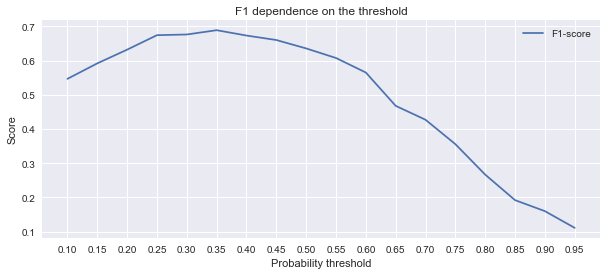

In [57]:
#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость

#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')
 
#Даём графику название и подписываем оси
ax.set_title('F1 dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
#Устанавливаем отметки по оси x
ax.set_xticks(thresholds) 
#Отображаем легенду
ax.legend();

**Задание 4.6**

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Чему равно значение целевой метрики на тестовой выборке? Ответ приведите с точностью до двух знаков после точки-разделителя.

In [58]:
#Задаём оптимальный порог вероятностей
threshold_opt = 0.35
#Пациентов, для которых вероятность наличия диабета > 0.4, относим к классу 1
#В противном случае — к классу 0
y_pred_opt = y_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.classification_report(y_test, y_pred_opt))
print('F1 test: {:.2f}'.format(metrics.f1_score(y_test, y_pred_opt)))


              precision    recall  f1-score   support

           0       0.88      0.78      0.82       424
           1       0.62      0.77      0.69       204

    accuracy                           0.77       628
   macro avg       0.75      0.77      0.76       628
weighted avg       0.79      0.77      0.78       628

F1 test: 0.69


______________________________________________

### 5. Деревья решений

✍ В этом юните мы познакомимся с ещё одним семейством моделей машинного обучения — деревьями решений. Для начала поговорим о том, что такое дерево решений и как с его помощью решают задачу классификации.

Деревья решений являются одним из наиболее понятных человеку и в то же время мощных алгоритмов принятия решений. К тому же на их основе строятся самые эффективные ансамблевые модели машинного обучения, такие как случайный лес, о котором мы поговорим далее.

Алгоритмы на основе деревьев решений могут использоваться как для решения задач классификации, так и для регрессии. В этом модуле мы разберём задачу классификации, а в дальнейшем, когда будем разбирать математическую составляющую алгоритмов, поговорим о том, как научить дерево решать задачу регрессии.

Если коротко, решающее дерево предсказывает значение целевой переменной с помощью применения последовательности простых решающих правил. Этот процесс в некотором смысле согласуется с естественным для человека процессом принятия решений.

### ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ДЕРЕВЕ РЕШЕНИЙ

Сотрудник в свою очередь будет руководствоваться примерно следующим регламентом:

Если возраст владельца > 40 лет, то:  
    Если место эксплуатации автомобиля — город , то:  
        Если стаж > 10 лет, то:  
            Застраховать.  
        Если стаж < 10 лет, то:  
            Не страховать.  
    Если место эксплуатации автомобиля — сельская местность, то:  
        Застраховать.  
    Если возраст владельца ≤ 40 лет, то:  
        Если аварий не было зафиксировано, то:  
            Застраховать.  
        Если были аварии, то:  
            Если тип автомобиля — минивэн, то:  
                Застраховать.  
            Если тип автомобиля — спорткар, то:
                Не страховать.  

То есть сотрудник при принятии решения использует информацию, предоставленную вами в анкете, и подает её на вход вложенного условного оператора.

Для простоты восприятия можно представить такой подход визуально в виде следующего дерева:

<img src="data\dst3-ml3-5_1.png" alt="drawing" width="800"/>

Аналогичным образом работает и алгоритм машинного обучения под названием **«дерево решений» (Decision Tree)**. 

Если дерево уже обучено, то есть уже сформулированы условия в прямоугольниках, то, когда в страховую компанию придёт новый автовладелец, сотруднику будет достаточно прогнать данные клиента через дерево решений и таким образом принять решение, то есть произвести классификацию.

Вот ещё один пример дерева решений. Большинство из нас когда-нибудь играли в игру «Слова на лбу» или «Тарантинки». На лоб каждого из игроков приклеивается бумажка с написанным на ней словом. Игрок может задавать другим игрокам вопросы о загаданном ему предмете/животном/человеке и т. д. Другие игроки могут отвечать на вопросы только «Да» и «Нет». **Цель** — за минимальное количество вопросов догадаться, о чём идёт речь.

Логика «если …, то …» используется людьми повседневно и поэтому интуитивно понятна каждому из нас. На основании этих рассуждений можно построить мощный алгоритм машинного обучения.

Деревья решений находят своё применение во множестве прикладных задач.

Успешнее всего деревья применяют в следующих областях:

**Банковское дело**. Оценка кредитоспособности клиентов банка при выдаче кредитов.  
**Промышленность**. Контроль качества продукции (обнаружение дефектов в готовых товарах), испытания без нарушений (например, проверка качества сварки) и т. п.  
**Медицина**. Диагностика заболеваний разной сложности.  
**Молекулярная биология**. Анализ строения аминокислот.  
**Торговля**. Классификация клиентов и товара.  

Теперь перейдём к формальной части. Нам важно уже сейчас познакомиться с терминологией деревьев решений, чтобы понять общий принцип их обучения.

Пусть у нас есть всё та же матрица наблюдений X, в которой содержатся наблюдения и характеризующие их признаки (привычный нам DataFrame), и правильные ответы y — метки классов. 

Дадим определение дереву решений и его составляющим ↓

Формально структура дерева решений — это **связный ациклический граф**. Что это значит?

**Граф** — это абстрактная топологическая модель, которая состоит из вершин и соединяющих их рёбер.

**Связный граф** — это граф, в котором между любой парой существует направленная связь.

**Ациклический граф** — это граф, в котором отсутствуют циклы, то есть в графе не существует такого пути, по которому можно вернуться в начальную вершину.

<img src="data\dst3-ml3-5_2.png" alt="drawing" width="800"/>

**Примечание**. Рекомендуем вам запомнить данное лаконичное определение дерева — так вы сможете показать свой уровень знаний перед будущим работодателем.

В дереве решений можно выделить **три типа вершин**:

<img src="data\dst3-ml3-5_3.png" alt="drawing" width="600"/>

**Корневая вершина (root node)** — то, откуда всё начинается. Это первый и самый главный вопрос, который дерево задаёт объекту. В примере со страхованием это был вопрос «Возраст автовладельца > 40».  
**Внутренние вершины (intermediate nodes)** — это дополнительные уточняющие вопросы, которые дерево задаёт объекту.   
**Листья (leafs)** — конечные вершины дерева. Это вершины, в которых содержится конечный «ответ» — класс объекта.  
Максимально возможная длина от корня до самых дальних листьев (не включая корневую) называется **максимальной глубиной дерева (max depth)**.

Во внутренней или корневой вершине признак проверяется на некий логический критерий, по результатам которого мы движемся всё глубже по дереву. Например, «Количество кредитов  1». 

Логический критерий, который находится в каждой вершине, называется **предикатом**, или **решающим правилом**.

На самом деле все предикаты — это просто взятие порога по значению какого-то признака. Формально это записывается следующим образом:

<img src="data\pic-39.png" alt="drawing" width="1000"/>

Если результат предиката равен 1, то мы переходим по левой ветви дерева к следующему узлу, в противном случае — по правой ветви дерева к следующему узлу.

А что насчёт геометрии?

Каждый новый вопрос дерева решений при его обучении разбивает пространство признаков на две части: в первую часть отправляются наблюдения, для которых предикат истинен, а во вторую — для которых он ложен.

Посмотрим, как это будет выглядеть, на примере. 

Вам уже знакома задача классификации про ирисы. **Ирисы Фишера** — это задача, на которой Рональд Фишер ещё в 1936 году (почти 100 лет назад!) продемонстрировал работу алгоритма, разделяющего ирисы на сорта в зависимости от параметров долей околоцветника.

Пусть у нас есть следующие признаки:

длина внутренней доли околоцветника (англ. petal length);  
ширина внутренней доли околоцветника (англ. petal width).  

На основании этих двух признаков требуется разделить ирисы на три сорта:

ирис щетинистый (Iris Setosa);  
ирис виргинский (Iris virginica);  
ирис разноцветный (Iris versicolor).  

Пусть мы обучили на этих данных дерево решений с максимальной глубиной 1. Оно получилось вот таким:

В каждом блоке указаны следующие данные:

Предикат <img src="data\pic-40.png" alt="drawing" width="70"/> — условие, по которому выборка делится на две части: на ту, для которой условие выполняется, и ту, для которой не выполняется.  
*gini* — критерий информативности Джини, о котором мы поговорим чуть позже.  
*samples* — количество объектов, которые мы проверяем на данном шаге.  
*value* — распределение по классам для объектов, которые мы проверяем на данном шаге: например value=[0, 50, 50] означает, что на текущем этапе разделения в выборке находится 0 объектов класса setosa и по 50 объектов классов versicolor и virginica.  
*class* — класс, который мы присваиваем, если завершим выполнение алгоритма на данном шаге.  
А вот так будет выглядеть наш процесс разделения цветов на классы:

<img src="data\dst3-ml3-5_4.png" alt="drawing" width="400"/>

Как происходит построение разделяющих плоскостей?

<img src="data\pic-41.png" alt="drawing" width="1000"/>

Отметим, что деление пространства можно продолжать до тех пор, пока пространство не будет разделено так, чтобы верно выделить каждый из классов. 

Кстати, для каждой области можно подсчитать вероятность каждого из классов. Это просто отношение количества объектов -класса, которые попали в лист дерева, к общему количеству объектов в листе.

Например, для синей области вероятности будут равны:

<img src="data\pic-42.png" alt="drawing" width="1000"/>

### ПРОЦЕСС ПОСТРОЕНИЯ ДЕРЕВА РЕШЕНИЙ

✍ Существует множество стратегий https://scikit-learn.ru/1-10-decision-trees/#tree-algorithms-id3-c4-5-c5-0-and-cart построения деревьев решений. Мы рассмотрим стратегию, реализованную в библиотеке sklearn, — алгоритм **CART (Classification and Regression Tree)**, который предназначен для построения бинарных деревьев решений (деревьев, у которых каждая вершина связана с двумя другими вершинами нижнего уровня). Данный алгоритм, как следует из его названия, предназначен для решения задач классификации и регрессии.

Внимательный студент уже заметил, что построение дерева решений можно описать рекурсией. Каждая вершина дерева порождает две других вершины, а они в свою очередь порождают новые вершины, и так происходит до тех пор, пока не выполнится некоторый критерий остановки, например в вершине не останутся только наблюдения определённого класса.

**Примечание**. Если вы забыли, что такое рекурсия, рекомендуем вам вернуться к модулю по продвинутому использованию функций https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DSPR-2.0+14JULY2021/jump_to_id/298afb4ea6634ec1bc86c4ac7b2a080e и активировать рекурсивное мышление, оно нам понадобится.

Пусть у нас есть матрица наблюдений X и столбец с ответами — метками классов y. На основе примеров и ответов мы хотим построить дерево решений, которое будет производить классификацию.

Итак, псевдокод рекурсивной функции для построения решающего дерева будет выглядеть следующим образом (запускать код не нужно, так как он является абстрактным):

In [59]:
def build_decision_tree(X, y):
    node = Node()
    if stopping_criterion(X, y) is True:
        node = create_leaf_with_prediction(y)
        return node 
    else:
        X_left, y_left, X_rigth, y_rigth = best_split(X, y)
        node.left = build_decision_tree(X_left, y_left)
        node.right = build_decision_tree(X_rigth, y_rigth)


1. Создать новую вершину node.

На первой итерации это будет корневая вершина. На последующих это будут внутренние вершины.

2. Проверить некоторый критерий остановки stop_criterion().

Например, критерием остановки может быть следующее условие: все объекты, которые попали в вершину, — это объекты одного и того же класса.

Или достигнута максимальная глубина дерева (max_depth), например 5. Это значит, что дерево не будет продолжать делиться, если глубина уже равна 5.

Другой критерий: число наблюдений в листе (в sklearn этот параметр обозначен как min_samples_leaf) меньше заданного, например 7. Это значит, что при выполнении такого условия дерево продолжит делиться в том случае, если решающее правило выполняется как минимум для 7 наблюдений.

<img src="data\pic-43.png" alt="drawing" width="1000"/>

Создаются две новые вершины: левая и правая, в каждую из которых отправляется соответствующий набор данных.

То есть происходит рекурсивный вызов функции build_decision_tree(), и для каждой новой вершины алгоритм повторяется вновь с новым набором данных.

Примечание. Вершина дерева node задаёт целое поддерево идущих за ним вершин, если такие имеются, а не только саму вершину.

<img src="data\pic-44.png" alt="drawing" width="1000"/>

возраст заёмщика ≤ 25 лет,
возраст заёмщика ≤ 40 лет,
размер кредита ≤ 1000 $,
наличие детей ≤ 0.5 (если наличие детей — бинарный категориальный признак: 1 — есть дети, 0 — нет детей),
и так далее.
Видно, что на место xj и t можно подставить любой признак и порог соответственно.

Признак xj и его пороговое значение  в каждой из вершин и есть внутренние параметры дерева решений, которые мы пытаемся отыскать. Это аналог коэффициентов уравнения линейной и логистической регрессий. 

**Какие же и в какой последовательности нужно задавать вопросы, или как подобрать оптимальные параметры дерева?**

### ПОИСК ПАРАМЕТРОВ ДЕРЕВА РЕШЕНИЙ

→ Обратите внимание, что внутренние параметры дерева решений кардинально отличаются от линейных моделей.

В линейных моделях мы пытались найти такие коэффициенты в уравнениях, при которых наблюдался минимум функции потерь.

В деревьях же мы пытаемся выбрать такие признаки xj и их пороговые значения t, при которых произойдёт разделение набора на две части по какому-то критерию наилучшим образом. В нашем псевдокоде этот процесс организован в виде функции best_split().

→ Важно понимать, что дерево решений — это топологический алгоритм, а не аналитический, то есть структуру дерева не получится описать в виде формулы, как те же линейные модели. Поэтому про стандартные методы оптимизации, такие как градиентный спуск или тем более метод наименьших квадратов, можно забыть. 

Чтобы интуитивно понять, как организуется поиск параметров, вспомним про игру «Слова на лбу».

Пусть один человек загадывает знаменитость, а второй пытается отгадать, задавая только вопросы, на которые можно ответить «Да» или «Нет» (опустим варианты «не знаю» и «не могу сказать»).

Какой вопрос отгадывающий задаст первым делом? Конечно, такой, который лучше всего уменьшит количество оставшихся вариантов.

К примеру, вопрос «Это Анджелина Джоли?» в случае отрицательного ответа оставит более 7.5 миллиардов вариантов для дальнейшего перебора (строго говоря, поменьше, ведь не каждый человек — знаменитость, но всё равно немало), а вот вопрос «Это женщина?» отсечёт уже около половины знаменитостей.

То есть, признак пол намного лучше разделяет выборку людей, чем признак это Анджелина Джоли, национальность — испанец или любит футбол.

Интуитивно это соответствует уменьшению некоторой неопределённости, или, иначе говоря, повышению прироста **информативности**.

В случае «угадайки» знаменитостей критериев отбора может быть бесчисленное количество. Но когда мы работаем с набором данных, у нас ограниченное количество признаков и для них есть ограниченное количество порогов. Тогда мы можем полным перебором найти такую комбинацию j и t, которая обеспечит наилучшее уменьшение неопределённости.

Неопределённость можно измерять различными способами, в деревьях решений для этого используются **энтропия Шеннона** и **критерий Джини**. Мы подробно обсудим их реализацию в модулях по математике.

ОСТОРОЖНО, МАТЕМАТИКА!

<img src="data\pic-45.png" alt="drawing" width="1000"/>

<img src="data\pic-46.png" alt="drawing" width="1000"/>

<img src="data\pic-47.png" alt="drawing" width="1000"/>

<img src="data\pic-48.png" alt="drawing" width="1000"/>

<img src="data\pic-49.png" alt="drawing" width="1000"/>

<img src="data\pic-50.png" alt="drawing" width="1000"/>

<img src="data\pic-51.png" alt="drawing" width="1000"/>

Для правой группы потребовалось всего одно дополнительное разбиение по признаку «координата меньше либо равна 18», для левой — ещё три. Очевидно, энтропия группы с шариками одного цвета равна 0, что соответствует представлению, что группа шариков одного цвета — упорядоченная.

В итоге мы построили дерево решений, предсказывающее цвет шарика по его координате. Отметим, что такое дерево решений может плохо работать для новых объектов (определения цвета новых шариков), поскольку оно идеально подстроилось под обучающую выборку (изначальные 20 шариков). Для классификации новых шариков лучше подойдёт дерево с меньшим числом «вопросов» (или разделений), пусть даже оно и неидеально разбивает по цветам обучающую выборку.

### ДЕРЕВЬЯ РЕШЕНИЙ В SKLEARN

Работать будем с теми же данными о диабете:

In [60]:
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


Ранее мы с вами уже выбрали два наиболее коррелированных с целевой переменной признака: Glucose и BMI. Давайте вспомним, как выглядит диаграмма рассеяния, разделённая по цвету целевой переменной, признаком наличия диабета (Outcome):

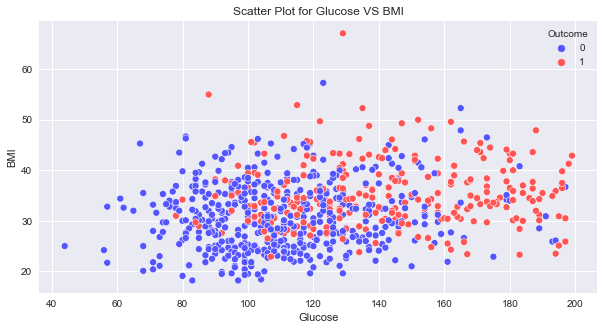

In [61]:
fig, ax = plt.subplots(figsize = (10, 5)) #фигура + координатная плоскость
#Строим диаграмму рассеяния
sns.scatterplot(
    data=diabetes_data, #датасет
    x='Glucose', #ось абсцисс
    y='BMI', #ось ординат
    hue='Outcome', #группировка
    palette='seismic', #палитра
    ax=ax, #координатная плоскость
);
#Задаём название графика
ax.set_title('Scatter Plot for Glucose VS BMI');

Создадим матрицу наблюдений X из признаков Glucose и BMI и столбец с правильными ответами y из признака Outcome:

In [62]:
#Создаём матрицу наблюдений X и столбец с ответами y
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

Будем решать задачу классификации пациентов с помощью дерева решений.

Модель дерева решений, его модификаций, а также функции для работы с деревьями находятся в модуле tree библиотеки sklearn. Импортируем его:

In [63]:
from sklearn import tree #модели деревьев решения

Модель дерева решений для решения задачи классификации реализована в классе **DecisionTreeClassifier**. Данный класс реализует обучение по алгоритму CART.

Основные параметры DecisionTreeClassifier

- criterion — критерий информативности ('gini' — критерий Джини и 'entropy' — энтропия Шеннона).
- max_depth — максимальная глубина дерева (по умолчанию — None, глубина дерева не ограничена).
- max_features — максимальное число признаков, по которым ищется лучшее разбиение в дереве (по умолчанию — None, то есть обучение производится на всех признаках). Нужно потому, что при большом количестве признаков будет «дорого» искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков.
- min_samples_leaf — минимальное число объектов в листе (по умолчанию — 1). У этого параметра есть понятная интерпретация: если он равен 5, то дерево будет порождать только те решающие правила, которые верны как минимум для пяти объектов.
- random_state — число, отвечающее за генерацию случайных чисел.

Давайте обучим дерево решений с критерием информативности criterion='entropy' (энтропия Шеннона), максимальной глубиной max_depth=3 и параметром random_state=42.

За обучение, как всегда, отвечает метод fit(). Данный метод реализует построение дерева решений по алгоритму CART, который мы рассматривали выше (алгоритм немного оптимизирован разработчиками sklearn, но смысл ровно тот же).

In [64]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_2d = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности 
    max_depth=3, #максимальная глубина
    random_state=42 #генератор случайных чисел
)
#Обучаем дерево решений по алгоритму CART
dt_clf_2d.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

Итак, мы обучили дерево решений. Обученное дерево можно визуализировать в виде графа, чтобы посмотреть, как дерево делает предсказание. Для этого есть функция plot_tree() из модуля tree.

Основные параметры функции:

decision_tree — объект обученного дерева решений,  
feature_names — наименования факторов,  
class_names — названия классов,  
filled — добавлять ли расцветку вершин графа.  

Вызовем эту функцию:

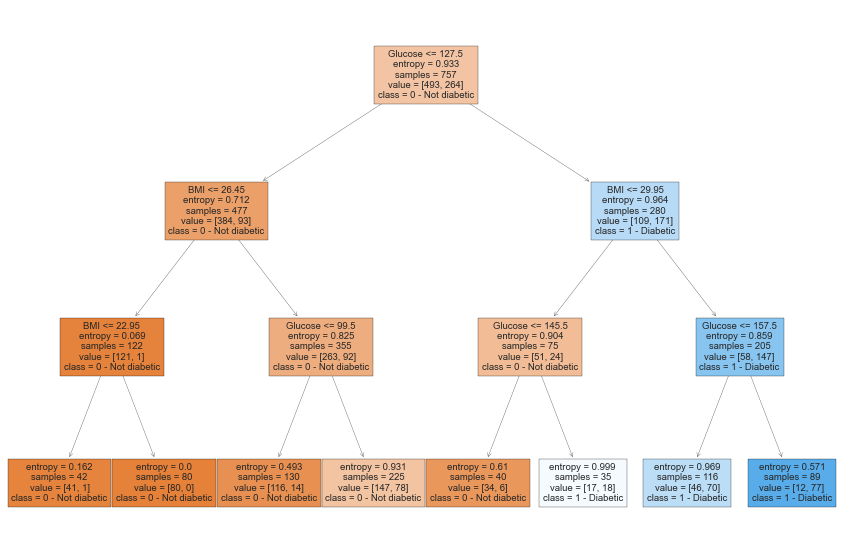

In [65]:
#Создаём фигуру для визуализации графа
fig = plt.figure(figsize=(15, 10))
#Строим граф дерева решений
tree.plot_tree(
    dt_clf_2d, #объект обученного дерева
    feature_names=X.columns, #наименования факторов
    class_names=["0 - Not diabetic", "1 - Diabetic"], #имена классов
    filled=True, #расцветка графа
);

<img src="data\pic-52.png" alt="drawing" width="1000"/>

In [66]:
#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]
#Делаем предсказание класса:
y_new_predict = dt_clf_2d.predict(x_new)
print('Predicted class: {}'.format(y_new_predict))
# Predicted class: [1]

Predicted class: [1]


c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


И predict_proba() — для предсказания вероятности принадлежности к каждому из классов:

In [67]:
#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]
#Делаем предсказание вероятностей:
y_new_proba_predict = dt_clf_2d.predict_proba(x_new)
print('Predicted probabilities: {}'.format(np.round(y_new_proba_predict, 3)))

# Predicted probabilities: [[0.135 0.865]]

Predicted probabilities: [[0.135 0.865]]


c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Давайте посмотрим, как будет выглядеть разделяющая поверхность дерева решений для двух признаков. Для этого воспользуемся функцией plot_probabilities_2d(), которую мы вам представляли в прошлом юните:

In [68]:
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от 40 до 200, BMI — от 10 до 80
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(40, 200, 0.1),
        np.arange(10, 80, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(data=X, x='Glucose', y='BMI', hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

Вызовем нашу функцию для визуализации:

c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


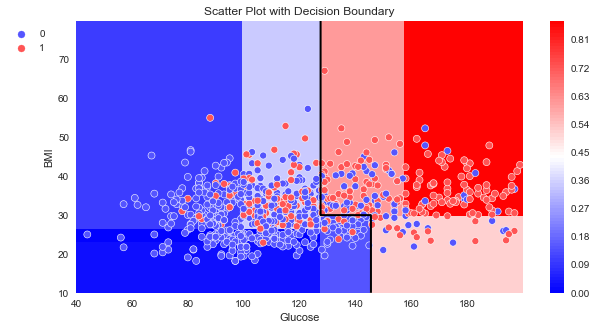

In [69]:
plot_probabilities_2d(X, y, dt_clf_2d)

Как и ожидалось, дерево решений разделило пространство на множество прямоугольных частей, каждая из которых соответствует определённому листу дерева.

Количество этих областей равно количеству листьев — 8.

**Примечание**. Так как вероятности в двух областях практически совпадают, на тепловой карте разница незаметна, области сливаются в одну и вы видите семь областей.

Попробуйте самостоятельно сопоставить построенное пространство с графом дерева решений, который мы построили выше.

Каждая часть пространства также соответствует определённой вероятности наличия диабета. Отследить её можно с помощью цветовой панели.

Чёрным обозначена граница, где вероятность наличия диабета равна 0.5. Точки, находящиеся правее этой разделяющей границы, относятся деревом к классу 1, а левее, — к классу 0.

Теперь вернитесь в юнит по логистической регрессии и сравните то, как дерево решений и логистическая регрессия делят пространство факторов на части.

Можно рассчитать полученные метрики качества. Для этого предскажем наличие диабета для всех пациентов из матрицы наблюдений X, а затем рассчитаем метрики классификации с помощью функции classification_report() из библиотеки sklearn:

In [70]:
#Делаем предсказание класса для всего набора данных
y_pred = dt_clf_2d.predict(X)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       493
           1       0.69      0.62      0.65       264

    accuracy                           0.77       757
   macro avg       0.75      0.74      0.74       757
weighted avg       0.77      0.77      0.77       757



→ Если сравните данный отчёт с полученным ранее для логистической регрессии, обученной на двух признаках, вы увидите, что даже с небольшой глубиной 3 дерево решений решает задачу классификации лучше, чем логистическая регрессия.

Давайте построим дерево решений без ограничения его максимальной глубины. Для этого нам просто не нужно задавать параметр max_depth:

In [71]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_bad = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=42 #генератор случайных чисел
)
#Обучаем дерево решений по алгоритму CART без ограничения его длины
dt_clf_bad.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

Сделаем предсказание:

In [72]:
#Делаем предсказание класса для всего набора данных
y_pred = dt_clf_bad.predict(X)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       493
           1       1.00      0.97      0.98       264

    accuracy                           0.99       757
   macro avg       0.99      0.98      0.99       757
weighted avg       0.99      0.99      0.99       757



Потрясающе! Как выросли метрики! Мы практически идеально решаем задачу предсказания наличия диабета. Задача, над которой бьются медики всего мира, решается простейшим алгоритмом машинного обучения с потрясающей точностью! Причём для диагностики нам достаточно всего двух признаков — уровня глюкозы и индекса массы тела.

Не кажется ли вам, что здесь что-то не так?

Давайте визуализируем граф (осторожно, код может выполняться в течение нескольких десятков секунд):

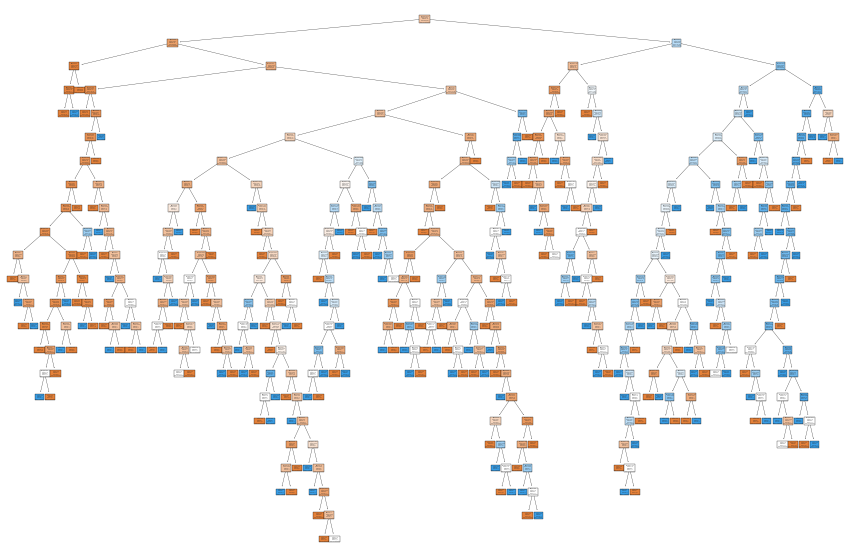

In [73]:
#Создаём фигуру для визуализации графа
fig = plt.figure(figsize=(15, 10))
#Строим граф 
tree_graph = tree.plot_tree(
    dt_clf_bad, #объект обученного дерева
    feature_names=X.columns, #наименования факторов
    class_names=["0 - Not diabetic", "1 - Diabetic"], #имена классов
    filled=True, #расцветка графа
);

Абсолютный хаос. Дерево задаёт огромное количество вопросов для того, чтобы предсказать правильный диагноз для каждого пациента из набора данных. Дерево настолько глубокое, что даже не помещается на экране.

Примечание. Посмотреть получившуюся глубину дерева можно с помощью метода get_depth():

In [74]:
dt_clf_bad.get_depth()

22

А теперь давайте посмотрим на разделяющую поверхность:

c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


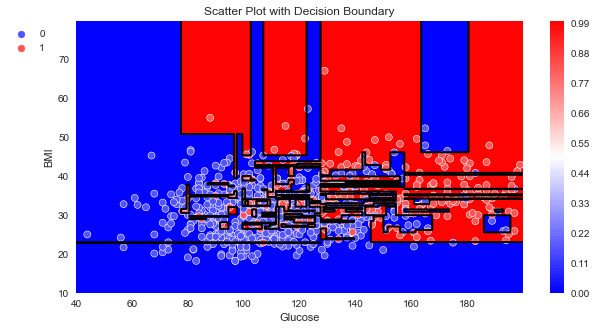

In [75]:
plot_probabilities_2d(X, y, dt_clf_bad)

Перед нами типичная картина переобучения дерева решений. Дерево решений разделило пространство на огромное количество отдельных частей, чтобы обозначить все точки из обучающего набора данных правильным классом (уменьшить энтропию до нуля).

Конечно же, такая модель не имеет никакой обобщающей способности и никому не нужна.

Важно!

Всегда используйте регуляризацию деревьев — ограничивайте их максимальную глубину (max_depth) и минимальное число объектов в листе (min_samples_leaf).

К тому же всегда стоит иметь под рукой не только обучающий, но и тестовый набор данных, чтобы оценить переобучение. Об этом мы поговорим в финальном практическом юните.

Давайте попробуем обучить дерево решений на всех признаках. Принцип остаётся тем же, меняется только матрица наблюдений X:

In [76]:
#Создаём матрицу признаков X и столбец с ответами y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

Будем использовать дерево решений с максимальной глубиной 6 (мы подобрали её заранее, при такой максимальной глубине наблюдается наименьшее переобучение).

Обучим модель на всех признаках с помощью метода fit(), затем сделаем предсказание с помощью метода predict() и выведем отчёт о метриках классификации с помощью функции classification_report():

In [77]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_full = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=6, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
#Обучаем модель по алгоритму CART
dt_clf_full.fit(X, y)
 
#Делаем предсказание класса
y_pred = dt_clf_full.predict(X)
#Выводим отчёт о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       493
           1       0.84      0.69      0.76       264

    accuracy                           0.85       757
   macro avg       0.84      0.81      0.82       757
weighted avg       0.84      0.85      0.84       757



Метрики значительно улучшились по сравнению с обучением на двух признаках.

Напоследок расскажем о ещё одной полезной особенности дерева решений. Она заключается в том, что дерево решений позволяет определить важность признаков.

Важность признаков можно посмотреть, обратившись к атрибуту feature_importance_:

In [78]:
print(dt_clf_full.feature_importances_)
# [0.02675774 0.36675873 0.03368236 0.04553664 0.24588118 0.14137465 0.14000868]

[0.02675774 0.36675873 0.03368236 0.04553664 0.24588118 0.14137465
 0.14000868]


Значения, которые будут выведены в качестве элементов массива, и есть коэффициенты важности каждого из признаков. Для удобства обычно строят столбчатую диаграмму:

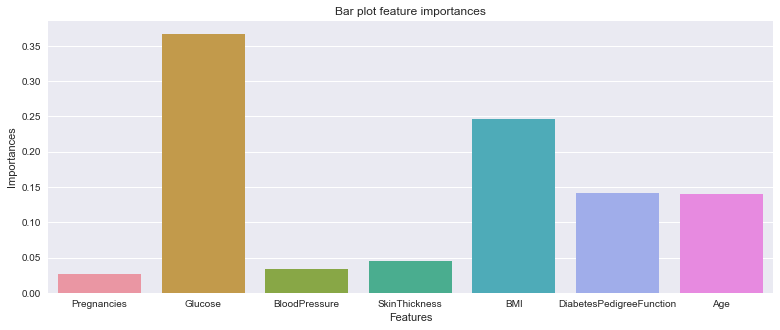

In [79]:
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
feature = X.columns #признаки
feature_importances = dt_clf_full.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances, ax=ax);
#Добавляем подпись графику, осям абсцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

Далее эту информацию можно использовать для интерпретации значимости каждого из признаков для предсказания.

Часто «древесные» модели используются в качестве методов для отбора наиболее важных признаков. Это важно, когда в вашем наборе данных большое количество признаков, из-за которых обучение более сложных моделей может стать очень длительным. 

Кроме того, значимость признаков можно использовать в рамках анализа бизнес-процессов. Значимость позволяет понять, на какие признаки стоит обратить наибольшее внимание, чтобы повысить, например, точность их измерения.

**Примечание**. Не стоит приравнивать значимость к корреляции. Корреляция — это коэффициент линейной зависимости, а значимость может отражать и нелинейные связи (в зависимости от сложности дерева).

**Задание 5.10**

Для выполнения задания используйте датасет о диабете из данного модуля. Для обучения используйте все доступные признаки.

Обучите дерево решений с максимальной глубиной 6 и критерием информативности Джини. В качестве значения параметра random_state возьмите число 42.

Сделайте предсказание и рассчитайте F1-меру.

Чему равно значение метрики? Ответ запишите с точностью до второго знака после точки-разделителя.

In [80]:
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')

In [81]:
X = X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [82]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_2d = tree.DecisionTreeClassifier(
    criterion='gini', #критерий информативности 
    max_depth=6, #максимальная глубина
    random_state=42 #генератор случайных чисел
)
#Обучаем дерево решений по алгоритму CART
dt_clf_2d.fit(X, y)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [83]:
y_pred = dt_clf_2d.predict(X)
#Рассчитываем F1-меру
print('F1 train: {:.2f}'.format(metrics.f1_score(y, y_pred)))


F1 train: 0.78


### ДОСТОИНСТВА И НЕДОСТАТКИ ДЕРЕВЬЕВ РЕШЕНИЙ

Обобщим всё вышесказанное, выделив основные достоинства и недостатки деревьев решений.

<img src="data\pic-53.png" alt="drawing" width="900"/>

https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%BD%D0%B0%D0%BC%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5

__________________________________________________________________

### 6. Введение в ансамбли: бэггинг. Случайный лес

✍ Одна модель хорошо, а много — лучше! С этой фразы мы с вами приоткрываем дверь в удивительный мир **ансамблевых моделей**.

**Ансамблевые модели** или просто **ансамбли (ensembles)** — это метод машинного обучения, где несколько простых моделей (часто называемых «слабыми учениками») обучаются для решения одной и той же задачи и объединяются для получения лучших результатов.

Необходимость использования ансамблей может возникнуть тогда, когда вы уже нашли хорошую модель и никак больше не можете повысить её качество. В этом случае можно перейти к более продвинутому методу: использовать не одну модель (пусть и очень хорошую), а ансамбли моделей.

Ансамбли — передовые алгоритмы для решения сложных задач машинного обучения. Сегодня они и нейронные сети являются главными конкурентами и дают наилучшие результаты, благодаря чему используются крупными компаниями в продакшене.

→ В этом модуле мы коснёмся основой идеи использования ансамблей на примере бэггинга и посмотрим на его реализацию для решения задач классификации в библиотеке sklearn, а в дальнейшем разберёмся, что за математическая «магия» стоит за ансамблевыми методами.

Говоря простыми словами, ансамбли — это объединение простых моделей в одного гиганта. Но объединять модели можно как угодно: например, взять тысячу разных логистических регрессий, а затем на их предсказаниях построить дерево решений, линейную регрессию или вообще нейронную сеть. А можно обучить сотню деревьев решений — построить целый лес, а для предсказания взять среднее. Вариаций объединения может быть сколько угодно.

Существует три проверенных способа построения ансамблей:

**Бэггинг** — параллельно обучаем множество одинаковых моделей, а для предсказания берём среднее по предсказаниям каждой из моделей.  
**Бустинг** — последовательно обучаем множество одинаковых моделей, где каждая новая модель концентрируется на тех примерах, где предыдущая допустила ошибку.  
**Стекинг** — параллельно обучаем множество разных моделей, отправляем их результаты в финальную модель, и уже она принимает решение.  

Об ансамблях типов бустинг и стекинг мы поговорим чуть позже в модуле, посвящённом продвинутым методам машинного обучения. В этом модуле разберёмся, что из себя представляет бэггинг и причём тут деревья решений.

### БЭГГИНГ. ОСНОВНЫЕ ИДЕИ

В 1906 г. в городе Плимут (Великобритания) на сельской ярмарке был проведён эксперимент. Фрэнсис Гальтон в качестве развлечения посетителей ярмарки предложил им на глаз оценить вес выставленного на всеобщее обозрение быка. За правильные ответы организаторы шоу обещали призы. В результате в голосовании приняли участие около 800 человек — как заядлых фермеров, так и людей, далёких от скотоводческих дел. Собрав после этой ярмарки все результаты, Гальтон высчитал среднее арифметическое значение для всей выборки — 1197 фунтов. Реальный же вес быка оказался 1198 фунтов. Каким-то непостижимым образом разношерстная публика дала ответ, максимально приближенный к реальному показателю. То есть ответ публики был точнее, чем ответ отдельно взятого эксперта, например мясника или скотовода.

По схожему принципу «голосования толпы» и работает бэггинг.

**Бэггинг (bagging)** — это алгоритм построения ансамбля путём параллельного обучения множества независимых друг от друга моделей.

В основе алгоритма лежит статистический метод, который называется **бутстрэпом (bootstrap)**. Идея бутстрэпа заключается в генерации  выборок размера  (бутстрэп-выборок) из исходного набора данных размера  путём случайного выбора элементов с повторениями в каждом из наблюдений. 

Схематично работу метода можно представить следующим образом:

<img src="data\dst3-ml3-6_1.png" alt="drawing" width="500"/>

Мы взяли исходный набор данных размером n=12 наблюдений и сгенерировали k=3 бутстрэп-выборки размером m=8 наблюдений. Обратите внимание, что наблюдения в выборках могут повторяться.

В частном случае можно генерировать выборки того же размера, то есть n=m . Таким образом, мы из набора данных создаём k датасетов из исходного того же размера.

Примечание. Такие бутстрэп-выборки часто используются для оценки различных статистических показателей (например, разброса или доверительного интервала). Если вычислять статистические оценки на нескольких независимых выборках, то мы можем оценить их разброс. Поиск большого количества независимых выборок сложен в силу того, что для этого требуется слишком много данных. Поэтому мы используем бутстрэп, чтобы создать несколько выборок.

**Примечание**. Такие бутстрэп-выборки часто используются для оценки различных статистических показателей (например, разброса или доверительного интервала). Если вычислять статистические оценки на нескольких независимых выборках, то мы можем оценить их разброс. Поиск большого количества независимых выборок сложен в силу того, что для этого требуется слишком много данных. Поэтому мы используем бутстрэп, чтобы создать несколько выборок.

Давайте обучим k одинаковых моделей на каждой из сгенерированных выборок, сделаем предсказания, а затем усредним их. Так мы получим бэггинг.

Схематично такой подход можно описать следующим образом:

<img src="data\dst3-ml3-6_2.png" alt="drawing" width="800"/>

**Примечание**. В случае классификации «усреднение» означает мажоритарное голосование (принцип большинства голосов). То есть объект относится к тому классу, за который проголосовало большинство алгоритмов.

Важно отметить, что в бэггинге в голосовании принимает участие модель одного вида. Эта модель называется **базовой моделью (base model)**. Нельзя обучить на половине сгенерированных наборов данных логистические регрессии, а на второй половине — деревья решений.

Когда мы будем разбирать математическое обоснование ансамблей, мы докажем следующие два утверждения:

- Смещение (bias) бэггинг-ансамбля не больше () смещения одного алгоритма из этого ансамбля.
- Однако разброс (variance) бэггинг-ансамбля в  раз меньше, чем разброс одного алгоритма из ансамбля, где k — количество алгоритмов в ансамбле.

Что это значит в переводе с математического?

Теорема гарантирует, что средняя ошибка ансамбля, построенного по принципу бэггинга, не выше, чем средняя ошибка базовой модели, но при этом шанс переобучения алгоритма значительно ниже.

Это очень важно для моделей, склонных к переобучению, таких как глубокие деревья решений.

### СЛУЧАЙНЫЙ ЛЕС

**Случайный лес (Random Forest)** — это самая распространённая реализация бэггинга, основанная на использовании в качестве базовой модели дерева решений. 

Помимо бутстрэпа, случайный лес использует **метод случайных подпространств**. https://en.wikipedia.org/wiki/Random_subspace_method Суть этого метода заключается в том, что каждая модель обучается не на всех признаках, а только на части из них. Такой подход позволяет уменьшить коррелированность между ответами деревьев и сделать их независимыми друг от друга.


#### АЛГОРИТМ ПОСТРОЕНИЯ СЛУЧАЙНОГО ЛЕСА ДЛЯ ЗАДАЧИ КЛАССИФИКАЦИИ

Пусть количество объектов в наборе данных равно N, а количество признаков — M. То есть размер набора данных — (N, M). Количество деревьев в лесу равно K. Тогда для обучения случайного леса необходимо выполнить следующие шаги:

1. С помощью бутстрэпа создать K наборов данных размера (N, M).
2. Для каждого сгенерированного набора данных применить метод случайных подпространств: выбрать L < M случайных признаков и получить K новых наборов данных размером (N, L).
3. На каждом наборе данных обучить K деревьев решений.

Когда поступят новые данные, нам нужно будет прогнать их через каждое дерево и объединить результаты отдельных деревьев мажоритарным голосованием или путём комбинирования вероятностей.

Ниже приведена схема работы описанного алгоритма для решения задачи классификации. Для простоты лес состоит из четырёх деревьев (K=4).

<img src="data\dst3-ml3-6_3.png" alt="drawing" width="800"/>

Давайте посмотрим, как работает алгоритм случайного леса, на примере. 

Пусть у нас есть набор данных со следующими факторами:

 x1 — возраст,  
 x2 — группа крови,  
 x3 — доход в тысячах рублей. 
  
**Целевой признак** (y) — подвергался ли человек операции хотя бы раз в жизни (1 — да, 0 — нет).  

Тогда, если мы обучим алгоритм случайного леса на представленных данных, мы получим следующую картину:

<img src="data\dst3-ml3-6_4.png" alt="drawing" width="800"/>

Количество объектов в наборе данных N=5, а количество факторов — M=3 (+1 целевой признак, его мы не включаем в размерность). Таким образом, размер таблицы наблюдений — (5, 3). Количество деревьев в лесу K=4.

1. На первом этапе алгоритма мы формируем K=4 бутстрэп выборки размером (5, 3), выбирая из таблицы строки случайным образом с возможностью повторения.  
2. На втором этапе мы случайным образом выбираем L=2 признаков из каждой таблицы и получаем четыре выборки размером (5, 2).  
3. На третьем этапе мы обучаем K=4 деревьев решений, каждое на своей выборке.  

Обратите внимание, что деревья, из которых состоит лес, могут быть различной глубины и структуры в зависимости от того, насколько просто была разделима поданная выборка.

Теперь, когда поступят новые данные, нам останется только подать их на вход каждого из деревьев, получить предсказания, а затем усреднить их путём мажоритарного голосования и получить ответ:

<img src="data\dst3-ml3-6_5.png" alt="drawing" width="800"/>

### СЛУЧАЙНЫЙ ЛЕС В SKLEARN

Конечно же, ансамблевые алгоритмы вручную пишут очень редко. Для этого есть библиотеки, такие как sklearn. 

В sklearn все ансамблевые методы реализованы в модуле ensemble. Давайте импортируем его:

In [84]:
from sklearn import ensemble

Будем работать с датасетом о диабете:

In [85]:
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


По традиции сначала построим модель на двух признаках (Glucose и BMI) и посмотрим, как будет выглядеть разделяющая поверхность случайного леса.

In [86]:
#Создаём матрицу наблюдений X и столбец с ответами y
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

В библиотеке sklearn модель случайного леса для решения задачи классификации реализована в классе **RandomForestClassifier**.

**Основные параметры RandomForestClassifier**

- n_estimators — количество деревьев в лесу (число K из бэггинга; по умолчанию равно 100);
- criterion — критерий информативности разбиения для каждого из деревьев ('gini' — критерий Джини и 'entropy' — энтропия Шеннона; по умолчанию — 'gini');
- max_depth — максимальная глубина одного дерева (по умолчанию — None, то есть глубина дерева не ограничена);
- max_features — максимальное число признаков, которые будут использоваться каждым из деревьев (число L из метода случайных подпространств; по умолчанию — 'sqrt'; для обучения каждого из деревьев используется √m признаков, где m — число признаков в начальном наборе данных);
- min_samples_leaf — минимальное число объектов в листе (по умолчанию — 1);
- random_state — параметр, отвечающий за генерацию случайных чисел.

Давайте создадим лес из 500 деревьев решений с максимальной глубиной 3. В качестве критерия информативности будем использовать энтропию. Число признаков в каждом дереве будем вычислять как √m.

Затем обучим модель случайного леса с помощью метода fit(), сделаем предсказание классов с помощью метода predict() и рассчитаем метрики.

In [87]:
#Создаём объект класса RandomForestClassifier
rf_clf_2d = ensemble.RandomForestClassifier(
    n_estimators=500, #число деревьев
    criterion='entropy', #критерий эффективности
    max_depth=3, #максимальная глубина дерева
    max_features='sqrt', #число признаков из метода случайных подпространств
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
rf_clf_2d.fit(X, y)
 
#Делаем предсказание класса
y_pred = rf_clf_2d.predict(X)
#Выводим отчёт о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       493
           1       0.73      0.57      0.64       264

    accuracy                           0.78       757
   macro avg       0.76      0.73      0.74       757
weighted avg       0.77      0.78      0.77       757



К сожалению, визуализировать то, как случайный лес принимает решение, как мы это делали с одним деревом решений, у нас не получится, так как в таком случае пришлось бы визуализировать 500 деревьев.

Однако мы можем построить разделяющую поверхность нашего леса, воспользовавшись функцией plot_probabilities_2d():

c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


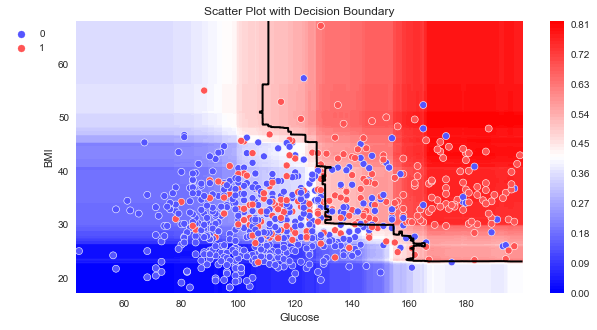

In [88]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость (линию, где вероятность равна 0.5)
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))
plot_probabilities_2d(X, y, rf_clf_2d)

Обратите внимание на то, как отличаются разделяющие поверхности одного дерева решений и целого леса из деревьев. При этом их максимальная глубина и критерий информативности идентичны. Эта разделяющая поверхность вычисляется на основе усреднения 500 различных разделяющих поверхностей базовых моделей. 

А теперь используем для предсказания все признаки из набора данных:

In [89]:
#Создаём матрицу признаков X и столбец с ответами y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']
 
 
#Создаём объект класса RandomForestClassifier
rf_clf_full = ensemble.RandomForestClassifier(
    n_estimators=300, #число деревьев
    criterion='entropy', #критерий эффективности
    max_depth=6, #максимальная глубина дерева
    max_features='sqrt', #число признаков из метода случайных подпространств
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
rf_clf_full.fit(X, y)
 
#Делаем предсказание класса
y_pred = rf_clf_full.predict(X)
#Выводим отчёт о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       493
           1       0.85      0.77      0.80       264

    accuracy                           0.87       757
   macro avg       0.86      0.85      0.85       757
weighted avg       0.87      0.87      0.87       757



Сравните полученные метрики с метриками простого дерева решений той же глубины и тем же критерием информативности, которое мы использовали в прошлом юните. 

Если мы захотим предсказывать не классы, а вероятности, чтобы, например, подобрать оптимальный порог вероятности, то сработает уже знакомый нам метод predict_proba():

In [90]:
rf_clf_full.predict_proba(X)

array([[0.7186633 , 0.2813367 ],
       [0.85222366, 0.14777634],
       [0.88358167, 0.11641833],
       ...,
       [0.28908312, 0.71091688],
       [0.44280536, 0.55719464],
       [0.94476689, 0.05523311]])

Метод возвращает вероятности принадлежности к классам 0 и 1 (отсутствие и наличие диабета соответственно) для каждого объекта из выборки.

К сожалению, визуализировать построенный лес в виде дерева, как и построить разделяющую поверхность леса, не получится. Это утверждение относится ко всем ансамблевым алгоритмам. Человеку сложно понять, по какому принципу ансамбль принимает решение. Это один из основных их недостатков. 

Однако так как случайный лес основан на деревьях решения, у него также есть атрибут feature_importances_, в котором находится коэффициенты важности каждого из признаков. Давайте построим столбчатую диаграмму, иллюстрирующую показатели важности для каждого признака.

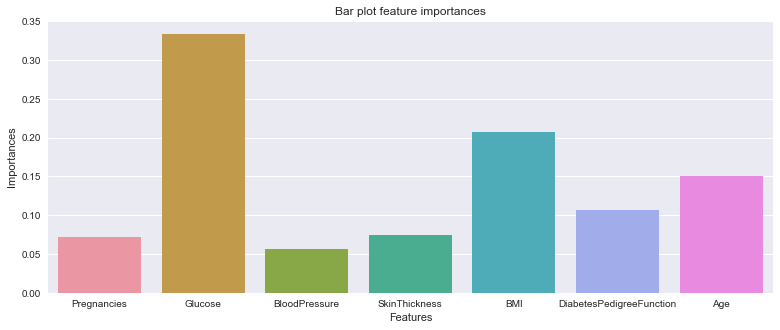

In [91]:
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
feature = X.columns #признаки
feature_importances = rf_clf_full.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances, ax=ax);
#Добавляем подпись графику, осям абсцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

Обратите внимание, что важность признаков для одного дерева и леса из деревьев могут отличаться. Случайный лес даёт более объективную картину об информативности признаков, так как информативность считается не по одному дереву, а по всей совокупности ансамбля.

**Задание 6.5**

Скачайте набор данных о винах. Вам необходимо будет предсказать качество вина по его характеристикам.

Для начала подготовим данные к бинарной классификации. Условно разделим вино на хорошее и плохое. Хорошим вином будем называть вино, параметр quality которого ≥ 6, плохим — всё остальное.

In [92]:
wine_data = pd.read_csv('data/winequality-red.csv', sep=';')
wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x>=6 else 0)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

Затем разделим выборку на тренировочную и тестовую:

In [93]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучите на тренировочной выборке (X_train, y_train) модель случайного леса, состоящего из 500 деревьев. Максимальная глубина каждого из деревьев — 8. Минимальное число объектов в листе — 10. В качестве критерия информативности используйте критерий Джини. Количество признаков, на которых обучается каждое из деревьев, возьмите как √m, где m — общее количество признаков. В качестве значения параметра random_state возьмите число 42.

Сделайте предсказание качества вина для тренировочного и тестового наборов данных.

Рассчитайте метрику accuracy для каждого набора и запишите её в качестве ответа с точностью до двух знаков после точки-разделителя.

In [94]:

#Создаём объект класса RandomForestClassifier
rf_clf_full = ensemble.RandomForestClassifier(
    n_estimators=500, #число деревьев
    criterion='gini', #критерий эффективности
    max_depth=8, #максимальная глубина дерева
    min_samples_leaf=10,
    max_features='sqrt', #число признаков из метода случайных подпространств
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
rf_clf_full.fit(X_train, y_train)
 
#Делаем предсказание класса
y_pred_train = rf_clf_full.predict(X_train)
y_pred_test = rf_clf_full.predict(X_test)

#Рассчитываем accuracy
print('Accuracy_train: {:.2f}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Accuracy_test: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred_test)))

Accuracy_train: 0.85
Accuracy_test: 0.75


______________________________________________________________

### 7. Деревья решений и случайный лес. Практика

Ознакомьтесь в ноутбуке ниже с решением задачи о предсказании категории дохода человека. Мы разбирали её в скринкасте юнита 4, используя в качестве алгоритма классификации логистическую регрессию. Предлагаем самостоятельно рассмотреть решение этой же задачи с помощью деревьев решения и случайного леса (в ноутбуке эти разделы называются «Дерево решений» и «Бэггинг. Случайный лес»).

https://lms.skillfactory.ru/assets/courseware/v1/e4ebe76c0e27b5f83e008217b9c0911f/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/AdultClassification.ipynb

https://lms.skillfactory.ru/assets/courseware/v1/f0202a25c7f53289bcaed630d2813271/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/adult.zip

✍️ Настало время попрактиковаться в использовании этих алгоритмов для решения задачи классификации.

В рамках практического задания мы продолжим рассматривать задачу об оттоке клиентов банка, с которой уже встречались в юните 4. Скачайте исходные данные:

Примечание. Для выполнения дальнейших заданий необходимо совершить уже знакомые шаги предобработки с данными об оттоке клиентов банка, а именно:
- выделить данные, относящиеся к отделениям банка в Германии;
- избавиться от заведомо неинформативных признаков;
- расширить датасет путем добавления новых признаков;
- разделить выборку на тренировочную и тестовую со стратификацией.

Ранее мы построили модель логистической регрессии, затем добавили в модель полиномиальные признаки и подобрали оптимальный порог вероятности для логистической регрессии.

→ Теперь попробуем решить задачу с помощью деревьев решений и лесов.

Деревья решений — алгоритм, способный уловить нелинейные зависимости. Генерация полиномиальных признаков практически не имеет значения.  
Поэтому для решения задачи используйте обучающую (X_train, y_train) и тестовую (X_test, y_test) выборки без полиномиальных столбцов.

In [95]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [96]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [97]:
churn_data = churn_data[churn_data['Geography'] == 'Germany']
churn_data.shape
# (2509, 14)

(2509, 14)

In [98]:
churn_data = churn_data.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Female,43,3,141349.43,1,1,1,100187.43,0


In [99]:
churn_data.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [100]:
churn_data['BalanceSalaryRatio'] = churn_data['Balance']/churn_data['EstimatedSalary']
churn_data['TenureByAge'] = churn_data['Tenure']/(churn_data['Age'])
churn_data['CreditScoreGivenAge'] = churn_data['CreditScore']/(churn_data['Age'])

In [101]:
churn_data['Gender'] = churn_data['Gender'].apply(lambda x: 1 if x=='Male' else 0)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0.963969,0.137931,12.965517
15,616,1,45,3,143129.41,2,0,1,64327.26,0,2.225020,0.066667,13.688889
16,653,1,58,1,132602.88,1,1,0,5097.67,1,26.012449,0.017241,11.258621
26,756,1,36,2,136815.64,1,1,1,170041.95,0,0.804599,0.055556,21.000000
28,574,0,43,3,141349.43,1,1,1,100187.43,0,1.410850,0.069767,13.348837


In [102]:
X = churn_data.drop("Exited", axis=1)
y = churn_data["Exited"]

In [103]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [104]:
y.value_counts(normalize=True)

0    0.675568
1    0.324432
Name: Exited, dtype: float64

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=0)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))
# Train shape: (1881, 12)
# Test shape: (628, 12)

Train shape: (1881, 12)
Test shape: (628, 12)


**Задание 7.1**

Обучите на обучающей выборке дерево решений с максимальной глубиной 8. В качестве критерия информативности используйте энтропию Шеннона. Минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

В качестве значения параметра random_state возьмите число 42. Остальные параметры оставьте по умолчанию.

Сделайте предсказания для тренировочной и тестовой выборок.

Чему равно значение целевой метрики на каждой из выборок? Ответ округлите до двух знаков после точки-разделителя.

In [108]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_full = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=8, #максимальная глубина дерева
    min_samples_leaf=10, #
    random_state=42 #генератор случайных чисел
)
#Обучаем модель по алгоритму CART
dt_clf_full.fit(X_train, y_train)
 
#Делаем предсказание класса
y_pred_train = dt_clf_full.predict(X_train)
y_pred_test = dt_clf_full.predict(X_test)

#Выводим отчёт о метриках
# print(metrics.classification_report(y_train, y_pred_train))
# print(metrics.classification_report(y_test, y_pred_test))
print('F1_train: {:.2f}'.format(metrics.f1_score(y_train, y_pred_train)))
print('F1_test: {:.2f}'.format(metrics.f1_score(y_test, y_pred_test)))


F1_train: 0.72
F1_test: 0.64


**Задание 7.2**

Постройте случайный лес из 500 деревьев с максимальной глубиной 8. Критерий информативности — энтропия Шеннона. Минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

В качестве значения параметра random_state возьмите число 42. Остальные параметры оставьте по умолчанию.

Сделайте предсказания для тренировочной и тестовой выборок.

Чему равно значение целевой метрики на каждой из выборок? Ответ округлите до двух знаков после точки-разделителя.

Сравните качество одного дерева решений с качеством случайного леса на тестовой выборке. Смогли ли вы улучшить метрику?

In [110]:

#Создаём объект класса RandomForestClassifier
rf_clf_full = ensemble.RandomForestClassifier(
    n_estimators=500, #число деревьев
    criterion='entropy', #критерий эффективности
    max_depth=8, #максимальная глубина дерева
    min_samples_leaf=10,
    #max_features='sqrt', #число признаков из метода случайных подпространств
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
rf_clf_full.fit(X_train, y_train)
 
#Делаем предсказание класса
y_pred_train = rf_clf_full.predict(X_train)
y_pred_test = rf_clf_full.predict(X_test)


#Рассчитываем F1-меру
print('F1 train: {:.2f}'.format(metrics.f1_score(y_train, y_pred_train)))
#Рассчитываем F1-меру
print('F1 test: {:.2f}'.format(metrics.f1_score(y_test, y_pred_test)))


F1 train: 0.74
F1 test: 0.66


**Задание 7.4**

Финальные штрихи

Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. Используйте модель, которая показала наилучшее качество.

В качестве порога вероятности используйте значения из следующего диапазона:

thresholds = np.arange(0.1, 1, 0.05)
Напомним, как определить оптимальный порог вероятности:

Предсказать вероятности оттока для каждого клиента из тестовой выборки.
В цикле перебирать значения порогов вероятности threshold.
Сделать предсказание класса по принципу: если вероятность  threshold, отнести объект к классу 1, в противном случае — к классу 0.
Рассчитать метрику и занести её в заранее созданный список.
Постройте график зависимости целевой метрики от порога вероятности.

Какому порогу вероятности соответствует наибольшее значение целевой метрики? Ответ округлите до двух знаков после точки-разделителя.

In [112]:
#Считаем вероятности наличия диабета для каждого из пациентов
#Нас интересует только вероятность класса (второй столбец)
y_test_proba_pred = rf_clf_full.predict_proba(X_test)[:, 1]
#Для удобства завернём numpy-массив в Pandas Series
y_proba_pred = pd.Series(y_test_proba_pred)


#Создадим списки, в которых будем хранить значения метрик 
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #вероятность > threshold, относим к классу 1
    #В противном случае — к классу 0
    y_pred = y_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    f1_scores.append(metrics.f1_score(y_test, y_pred))
    
print('F1 test: {:.2f}'.format(max(f1_scores)))



F1 test: 0.70


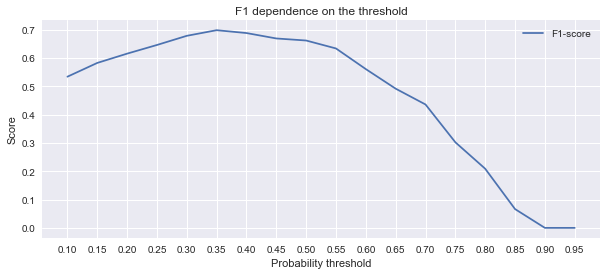

In [113]:

#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость

#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')
 
#Даём графику название и подписываем оси
ax.set_title('F1 dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
#Устанавливаем отметки по оси x
ax.set_xticks(thresholds) 
#Отображаем легенду
ax.legend();

**Задание 7.5**

Сделайте предсказание на тестовой выборке с подобранным порогом вероятности. Используйте модель, показавшую наилучшее качество.

Чему равно значение целевой метрики на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя.

In [114]:
threshold = 0.35

predicted_proba = rf_clf_full.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

print('F1 test: {:.2f}'.format(metrics.f1_score(y_test, predicted)))

F1 test: 0.70
